# ONLINE SHOPPERS INTENTION PREDICTION

Nouredeen Ahmed Mahmoud Ali HAMMAD - 2121221362

Obada Masri - 2121221405 	

Tarik Alrayan - 2121221366

## 1) Proje Genel Açıklama:
### a. Neden bu problem seçildi?
E-ticaret sitelerindeki kullanıcı davranışlarından yola çıkarak gelecekteki satın alma niyetlerini tahmin etmek, böylece kişiselleştirilmiş öneriler sunarak kullanıcı deneyimini iyileştirmek ve satışları artırmak amacıyla seçilmiştir.
           
### b. Hangi yapay öğrenme teknikleri uygulanacak?
Lojistik Regresyon, Karar Ağaçları ve Rastgele Ormanlar makine öğrenmesi algoritmaları uygulanmıştır.
           
### c. Seçilen veri kümesi hakkında özet bilgi.
"Online Shoppers Purchasing Intention Dataset" kullanılmıştır. Bu veri kümesi, 12.330 çevrimiçi alışveriş oturumunu ve kullanıcıların sayfa süreleri, terk etme oranları gibi bilgilerini içeren 17 özelliği barındırır. Hedef değişken, satın alma yapılıp yapılmadığını gösteren "Revenue"dir.


## 2) Açıklayıcı Veri Analizi (Exploratory Data Analysis - EDA):

### a. Veri setinin boyutu 12330 satır, 18 sütundur.

### b. Özelliklerin ne anlamına geldiği ve veri türleri:



### Sayfa Ziyaret Sayıları ve Süreleri:
"Administrative" (İdari), "Administrative Duration" (İdari Süre): Ziyaretçinin o oturumda ziyaret ettiği farklı idari sayfa sayısı ve bu kategoride harcanan toplam süre.

"Informational" (Bilgilendirici), "Informational Duration" (Bilgilendirici Süre): Ziyaretçinin o oturumda ziyaret ettiği farklı bilgilendirici sayfa sayısı ve bu kategoride harcanan toplam süre.

"Product Related" (Ürünle İlgili), "Product Related Duration" (Ürünle İlgili Süre): Ziyaretçinin o oturumda ziyaret ettiği farklı ürünle ilgili sayfa sayısı ve bu kategoride harcanan toplam süre.

Bu özelliklerin değerleri, ziyaret edilen sayfaların URL bilgisinden türetilir ve kullanıcı bir eylemde bulunduğunda (örn. bir sayfadan diğerine geçtiğinde) gerçek zamanlı olarak güncellenir.

### Google Analytics Metrikleri:
"Bounce Rate" (Hemen Çıkma Oranı): Bir web sayfası için, siteye o sayfadan girip başka bir istek tetiklemeden ayrılan ("hemen çıkan") ziyaretçilerin yüzdesi.

"Exit Rate" (Çıkış Oranı): Belirli bir web sayfasına yapılan tüm sayfa görüntülemeleri için, oturumdaki son sayfa olma yüzdesi.

"Page Value" (Sayfa Değeri): Bir kullanıcının bir e-ticaret işlemini tamamlamadan önce ziyaret ettiği bir web sayfasının ortalama değeri.

### Diğer Özellikler:
"Special Day" (Özel Gün): Site ziyaret zamanının, oturumların işlemle sonuçlanma olasılığının daha yüksek olduğu belirli bir özel güne (örn. Anneler Günü, Sevgililer Günü) yakınlığını gösterir. Değeri, sipariş tarihi ile teslimat tarihi arasındaki süre gibi e-ticaret dinamikleri dikkate alınarak belirlenir (Örn: Sevgililer Günü için 2-12 Şubat arası sıfırdan farklı, 8 Şubat'ta maksimum 1 değerini alır).

İşletim sistemi (Operating system)

Tarayıcı (Browser)

Bölge (Region)

Trafik türü (Traffic type)

Ziyaretçi türü (Visitor type): geri dönen veya yeni ziyaretçi

Hafta sonu (Weekend): Ziyaret tarihinin hafta sonu olup olmadığını gösteren bir Boolean (doğru/yanlış) değer.

Yılın ayı (Month of the year)

## Kütüphaneleri ve Veriyi Yükleme

In [1]:
# %% Gerekli Kütüphanelerin Yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

print("\nVeri Kümesinin İlk 5 Satırı:")
df.head()


Veri Kümesinin İlk 5 Satırı:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Statistiksel bilgileri:

In [3]:
# %% a. Veri Kümesinin Boyutları
print("\n--- Veri Kümesinin Boyutları ---")
rows, cols = df.shape
print(f"Satır Sayısı: {rows}")
print(f"Sütun (Özellik + Hedef) Sayısı: {cols}")


--- Veri Kümesinin Boyutları ---
Satır Sayısı: 12330
Sütun (Özellik + Hedef) Sayısı: 18


In [4]:
# %% b. Özellik Açıklamaları ve Tipleri
print("\n--- Veri Tipleri ---")
df.info()


--- Veri Tipleri ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  

In [5]:
# %% c. Açıklayıcı İstatistikler
print("\n--- İstatistikler ---")

print(df.describe(include='all').round(3))


--- İstatistikler ---
        Administrative  Administrative_Duration  Informational  \
count        12330.000                12330.000      12330.000   
unique             NaN                      NaN            NaN   
top                NaN                      NaN            NaN   
freq               NaN                      NaN            NaN   
mean             2.315                   80.819          0.504   
std              3.322                  176.779          1.270   
min              0.000                    0.000          0.000   
25%              0.000                    0.000          0.000   
50%              1.000                    7.500          0.000   
75%              4.000                   93.256          0.000   
max             27.000                 3398.750         24.000   

        Informational_Duration  ProductRelated  ProductRelated_Duration  \
count                12330.000       12330.000                12330.000   
unique                     NaN    

## Grafikler

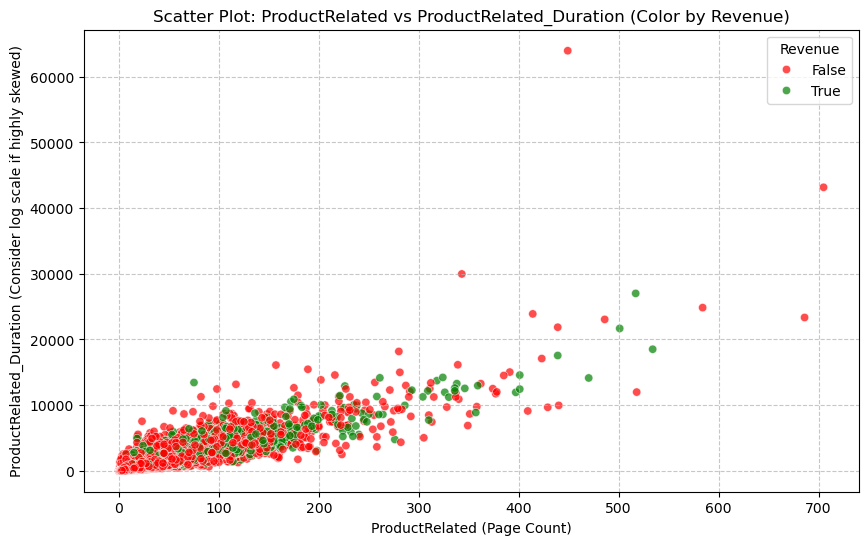

In [6]:
# 1. Scatter plot: "ProductRelated" vs "ProductRelated_Duration", color by "Revenue"
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['ProductRelated'], y=df['ProductRelated_Duration'], hue=df['Revenue'], alpha=0.7, palette={True: 'green', False: 'red'})
plt.title('Scatter Plot: ProductRelated vs ProductRelated_Duration (Color by Revenue)')
plt.xlabel('ProductRelated (Page Count)')
plt.ylabel('ProductRelated_Duration (Consider log scale if highly skewed)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
print("\n")

### Yorum:
Ürün sayfası sayısı veya harcanan süre artmaya devam ettikçe gelirde net bir artış eğilimi görünmese de, 0 gelir değerlerinin çoğunluğunun 0 ile 200 sayfa arasında, özellikle 0 ile 50 sayfa arasında yoğunlaştığını açıkça görebiliyoruz. 1 gelir değerleri ise belirli bir kümelenme göstermese de, çoğunlukla 50 ile 200 sayfa arasına yayılıyor. Site aktivitesi, süre olarak 10000 saniye eşiği geçildikten sonra önemli ölçüde azalıyor.

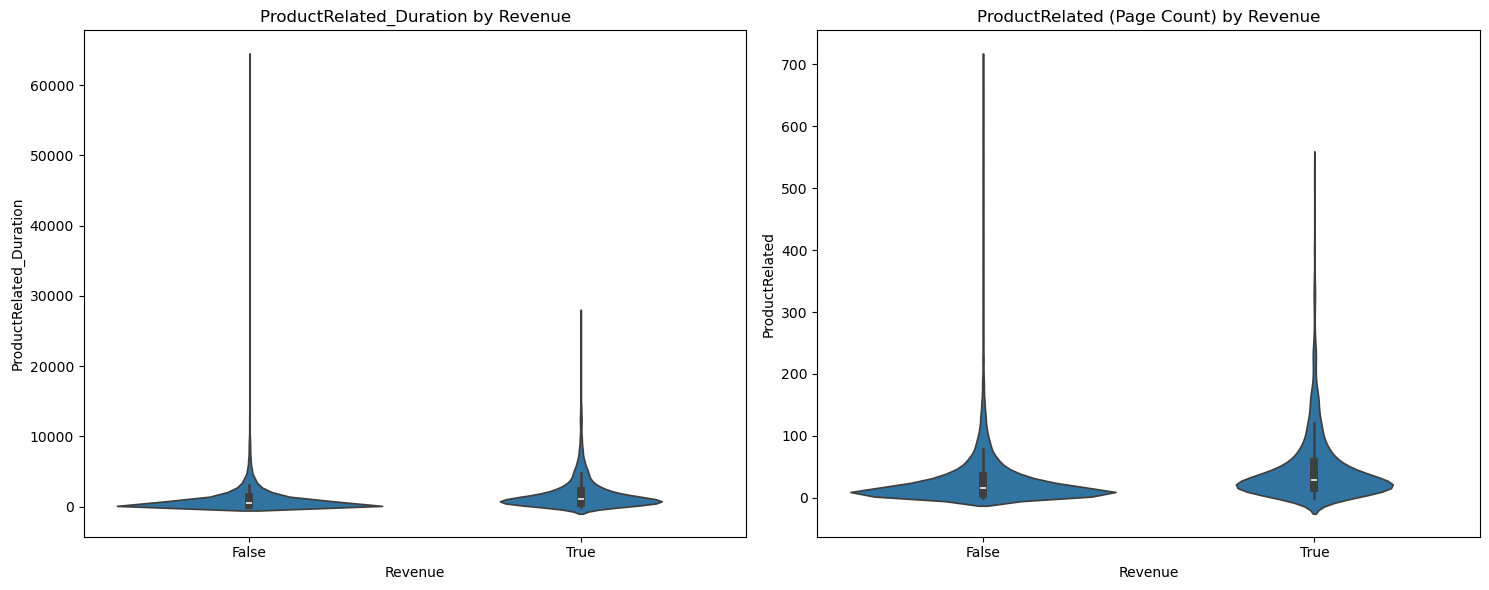

In [7]:
# 2. Two violin plots comparing "ProductRelated_Duration" vs "Revenue" and "ProductRelated" vs "Revenue"
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.violinplot(x=df['Revenue'], y=df['ProductRelated_Duration'], ax=axes[0])
axes[0].set_title('ProductRelated_Duration by Revenue')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('ProductRelated_Duration')

sns.violinplot(x=df['Revenue'], y=df['ProductRelated'], ax=axes[1])
axes[1].set_title('ProductRelated (Page Count) by Revenue')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('ProductRelated')

plt.tight_layout()
plt.show()
print("\n")

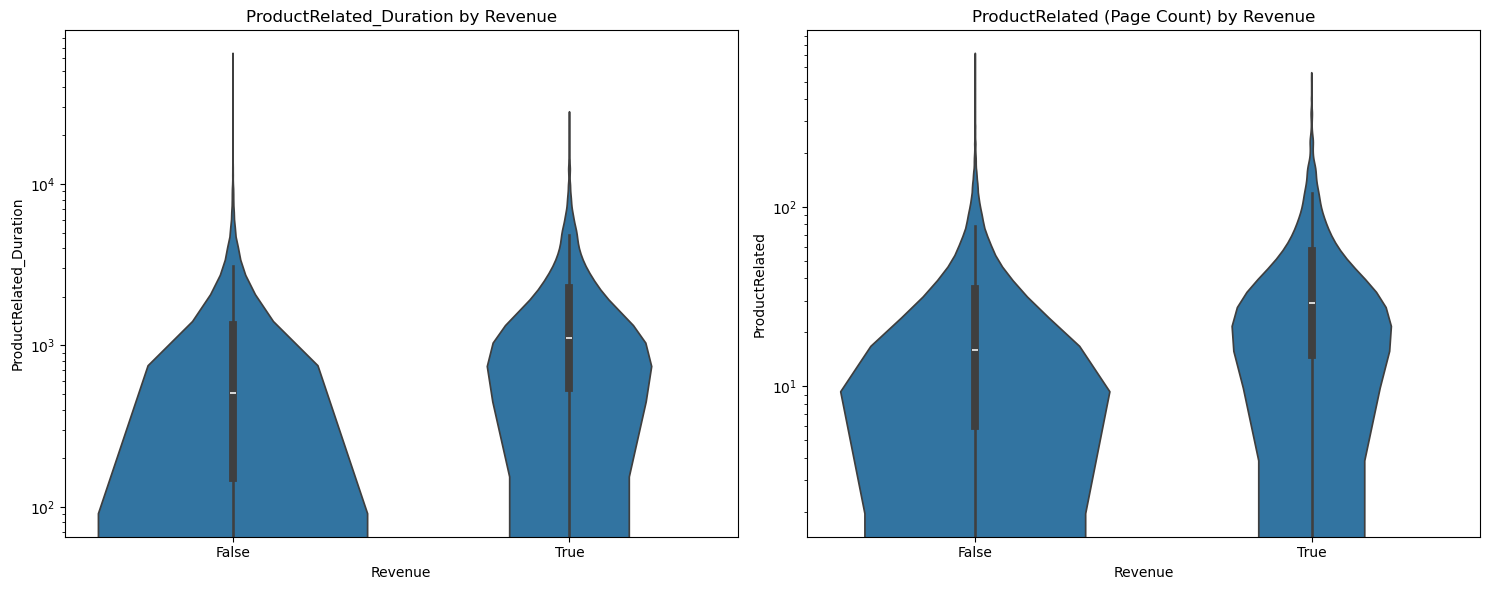

In [8]:
# LOG SCALE'İ UYGULANMIŞ HALİ
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.violinplot(x=df['Revenue'], y=df['ProductRelated_Duration'], ax=axes[0])
axes[0].set_title('ProductRelated_Duration by Revenue')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('ProductRelated_Duration')
axes[0].set_yscale('log')

sns.violinplot(x=df['Revenue'], y=df['ProductRelated'], ax=axes[1])
axes[1].set_title('ProductRelated (Page Count) by Revenue')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('ProductRelated')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()
print("\n")

### Yorum:
Her iki grafikte de, başarılı satışlardaki medyan değerler, ortalama olarak sitede daha fazla zaman harcandığını ve daha fazla sayfa ziyaret edildiğini gösteriyor.

C:\Users\Techno\AppData\Local\Temp\ipykernel_29096\343486901.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_axis_col_name, y='Conversion Rate (Revenue True %)', data=conversion_rate_df, ax=axes[i], palette="viridis")
C:\Users\Techno\AppData\Local\Temp\ipykernel_29096\343486901.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_axis_col_name, y='Conversion Rate (Revenue True %)', data=conversion_rate_df, ax=axes[i], palette="viridis")
C:\Users\Techno\AppData\Local\Temp\ipykernel_29096\343486901.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

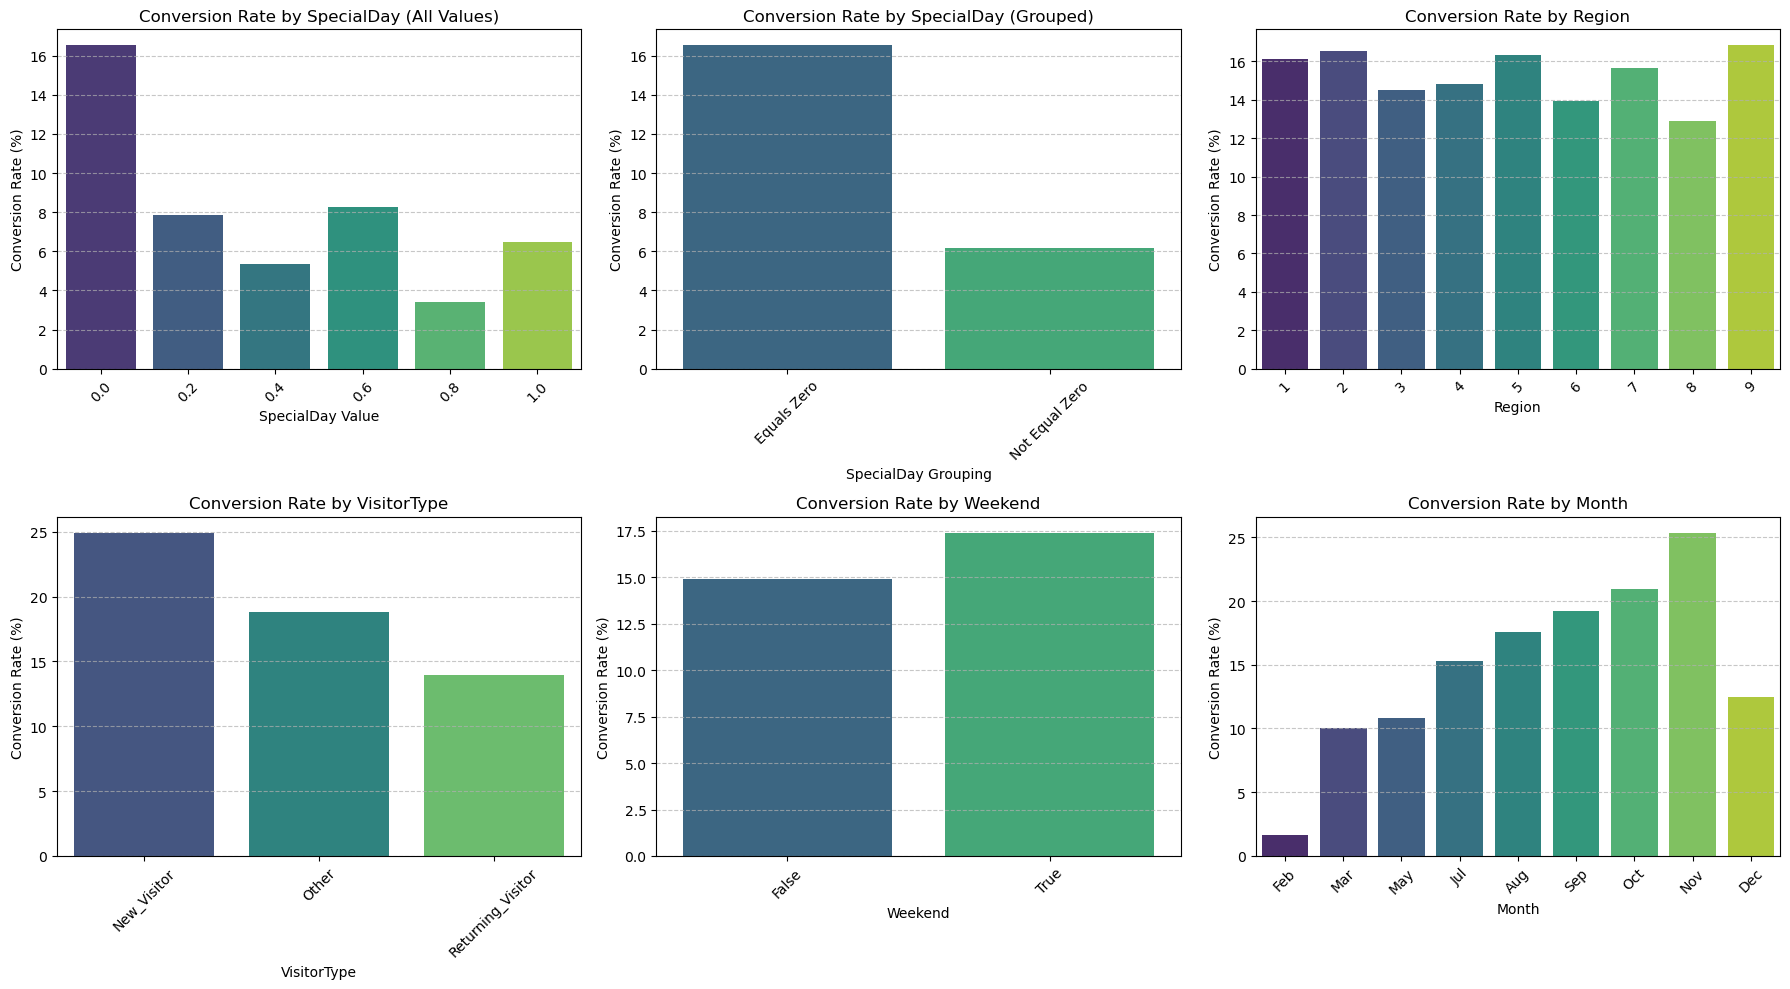

In [9]:
# 3. Bar charts comparing "Revenue" with various features.

# Define identifiers for plotting. We'll map these to actual columns or derived columns.
plot_identifiers = ['SpecialDay_Original', 'SpecialDay_Grouped', 'Region', 'VisitorType', 'Weekend', 'Month']

# Determine grid size for subplots
n_plots = len(plot_identifiers)
n_cols = 3  # You can adjust this
n_rows = (n_plots + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5)) # Adjusted figsize if needed
axes = axes.flatten() # Flatten to easily iterate

for i, identifier in enumerate(plot_identifiers):
    plot_data_df = df.copy() # Work on a copy
    x_axis_col_name = '' # The column name to use for x-axis in sns.barplot
    current_plot_title = ''
    current_xlabel = ''

    if identifier == 'SpecialDay_Original':
        x_axis_col_name = 'SpecialDay'
        current_plot_title = 'Conversion Rate by SpecialDay (All Values)'
        current_xlabel = 'SpecialDay Value'
        # Group by the raw 'SpecialDay' column
        conversion_rate_df = plot_data_df.groupby(x_axis_col_name)['Revenue'].mean().reset_index()
        # Sort by SpecialDay value for better readability
        conversion_rate_df = conversion_rate_df.sort_values(by=x_axis_col_name)

    elif identifier == 'SpecialDay_Grouped':
        # Create the 'SpecialDay_Temp_Grouped' column
        plot_data_df['SpecialDay_Temp_Grouped'] = plot_data_df['SpecialDay'].apply(
            lambda x: 'Equals Zero' if x == 0.0 else 'Not Equal Zero'
        )
        x_axis_col_name = 'SpecialDay_Temp_Grouped'
        current_plot_title = 'Conversion Rate by SpecialDay (Grouped)'
        current_xlabel = 'SpecialDay Grouping'
        # Group by the new 'SpecialDay_Temp_Grouped' column
        conversion_rate_df = plot_data_df.groupby(x_axis_col_name)['Revenue'].mean().reset_index()
        # Ensure a consistent order for the grouped categories
        group_order = ['Equals Zero', 'Not Equal Zero']
        present_groups = [g for g in group_order if g in conversion_rate_df[x_axis_col_name].unique()]
        conversion_rate_df[x_axis_col_name] = pd.Categorical(conversion_rate_df[x_axis_col_name], categories=present_groups, ordered=True)
        conversion_rate_df = conversion_rate_df.sort_values(by=x_axis_col_name)


    elif identifier == 'Month':
        x_axis_col_name = 'Month'
        current_plot_title = f'Conversion Rate by {x_axis_col_name}'
        current_xlabel = x_axis_col_name
        conversion_rate_df = plot_data_df.groupby(x_axis_col_name)['Revenue'].mean().reset_index()
        # Sort months correctly
        month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        present_months = [m for m in month_order if m in conversion_rate_df[x_axis_col_name].unique()]
        conversion_rate_df[x_axis_col_name] = pd.Categorical(
            conversion_rate_df[x_axis_col_name],
            categories=present_months,
            ordered=True
        )
        conversion_rate_df = conversion_rate_df.sort_values(by=x_axis_col_name)
    else: # For Region, VisitorType, Weekend
        x_axis_col_name = identifier # The identifier is the actual column name
        current_plot_title = f'Conversion Rate by {x_axis_col_name}'
        current_xlabel = x_axis_col_name
        conversion_rate_df = plot_data_df.groupby(x_axis_col_name)['Revenue'].mean().reset_index()
        # Optional: Sort 'Region' if it's numerical and discrete for better plotting
        if identifier == 'Region':
            conversion_rate_df = conversion_rate_df.sort_values(by=x_axis_col_name)


    # Common part: rename Revenue column (which now holds the mean), convert to %, plot
    conversion_rate_df = conversion_rate_df.rename(columns={'Revenue': 'Conversion Rate (Revenue True %)'})
    conversion_rate_df['Conversion Rate (Revenue True %)'] *= 100

    sns.barplot(x=x_axis_col_name, y='Conversion Rate (Revenue True %)', data=conversion_rate_df, ax=axes[i], palette="viridis")
    axes[i].set_title(current_plot_title)
    axes[i].set_ylabel('Conversion Rate (%)')
    axes[i].set_xlabel(current_xlabel)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide any unused subplots if n_plots is not a multiple of n_cols
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Yorum:
1. Görünüşe göre normal günlerde müşterilerin satın alma olasılığı daha yüksek.
2. Tüm `SpecialDay` (Özel Gün) değerleri aynı grupta birleştirildiğinde, sonuç sütunu toplamı değil ortalamayı gösteriyor. Bu nedenle normal günler müşteri satın almalarına daha fazla yol açmaya devam ediyor.
3. Bölgeye (`Region`) dayalı olarak satışlarda önemli bir etki görünmüyor.
4. Şaşırtıcı bir şekilde, yeni ziyaretçilerin geri dönen ziyaretçilere göre satın alma olasılığı daha yüksek.
5. Hafta sonlarında biraz daha fazla satış yapılıyor.
6. Kasım ayı, muhtemelen tatil sezonu ve Noel nedeniyle müşteri satın alma oranının en yüksek olduğu ay. En düşük satışlar ise Şubat ayında yapılıyor. Şubat ayından Kasım ayına kadar yıl boyunca satışlarda kademeli bir artış var.

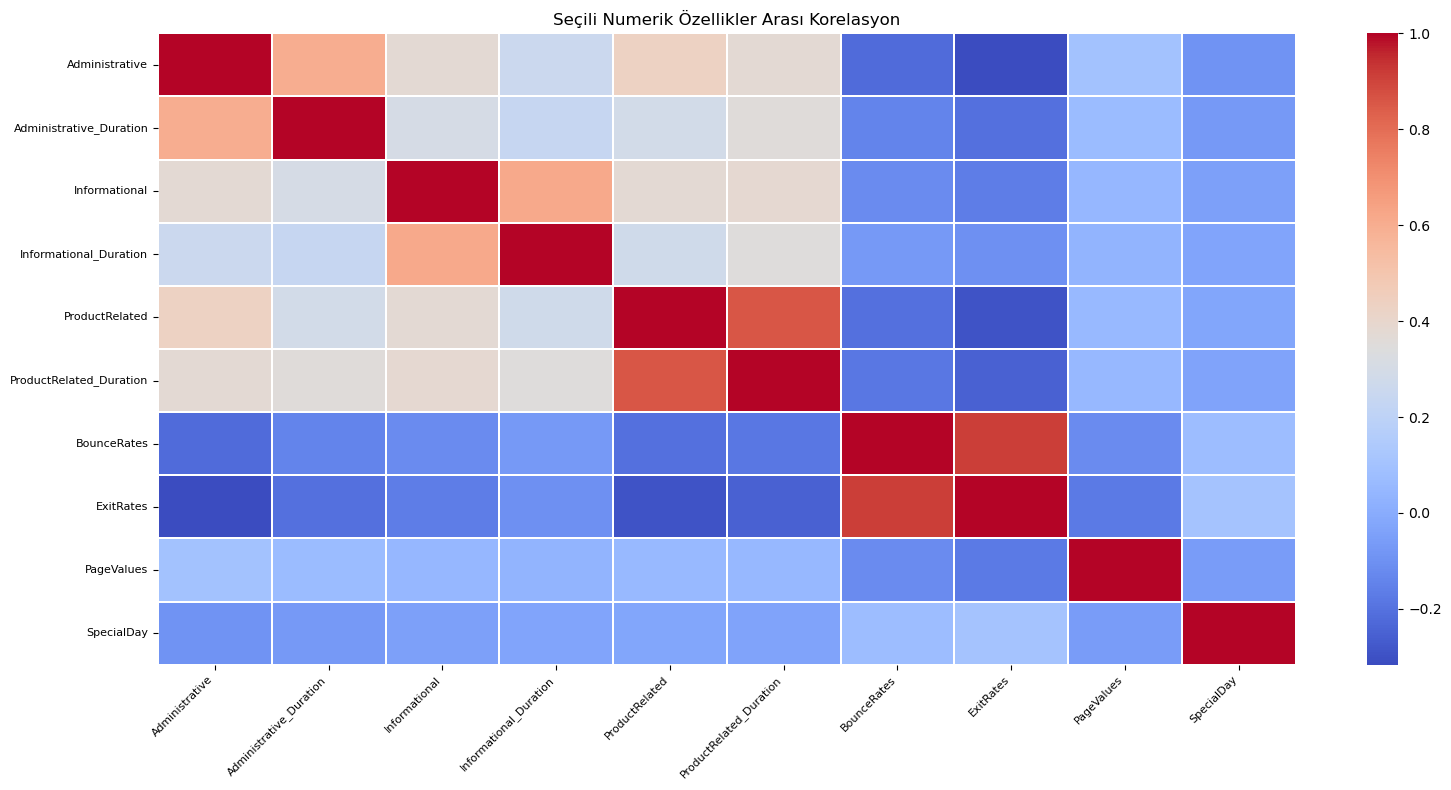

In [10]:

# Korelasyon Isı Haritası (Sadece numerik sütunlar için)
plt.figure(figsize=(16, 8))
# Sayısal tipteki sütunları seçelim (int ve float)
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
# Hedef değişkeni korelasyondan çıkarabiliriz
if 'Revenue' in numeric_cols:
    numeric_cols.remove('Revenue')
# Kategorik olarak kodlanmış integer'ları da çıkarabiliriz (OS, Browser, Region, TrafficType)
cols_to_exclude_from_corr = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend']
numeric_cols_for_corr = [col for col in numeric_cols if col not in cols_to_exclude_from_corr]

if numeric_cols_for_corr: # Eğer korelasyon için uygun sütun kaldıysa
    correlation_matrix = df[numeric_cols_for_corr].corr()
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.2, fmt=".2f") # annot=True çok kalabalık olabilir
    plt.title('Seçili Numerik Özellikler Arası Korelasyon')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
else:
    plt.text(0.5, 0.5, 'Korelasyon için uygun\nnumerik sütun bulunamadı.',
             horizontalalignment='center', verticalalignment='center')
    plt.title('Korelasyon Matrisi')
    plt.axis('off')

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Yorum:
Genel olarak çok fazla korelasyon olmasa da, her bir sayfa kategorisi (idari, bilgilendirici ve ürünle ilgili) için ziyaret edilen sayfa sayısı ile sitede harcanan süre arasında yüksek bir korelasyon bulunuyor.

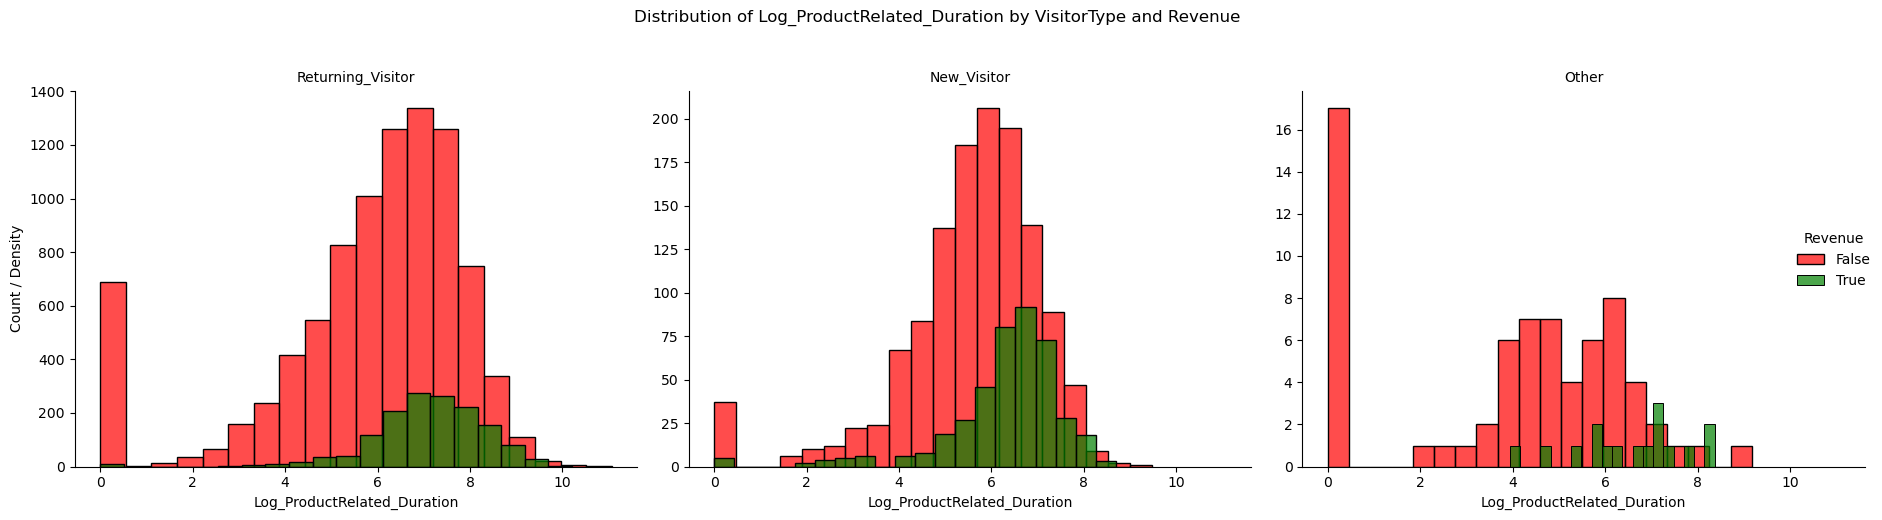

In [11]:
# 5. FacetGrid map for the "VisitorType" feature
# Example: Show distribution of "ProductRelated_Duration" for each "VisitorType", colored by "Revenue"

# If ProductRelated_Duration is highly skewed, consider log transformation for better visualization:
df['Log_ProductRelated_Duration'] = np.log1p(df['ProductRelated_Duration'])
# Then use 'Log_ProductRelated_Duration' in the FacetGrid.
# For this example, we'll plot 'ProductRelated_Duration' directly.

g = sns.FacetGrid(df, col='VisitorType', hue='Revenue', height=5, aspect=1.2, palette={True: 'green', False: 'red'}, sharey=False)
g.map(sns.histplot, 'Log_ProductRelated_Duration', bins=20, alpha=0.7, kde=False) # kde=True can also be useful
# Or for KDE plot: g.map(sns.kdeplot, 'ProductRelated_Duration', fill=True, alpha=0.7)
g.add_legend()
g.set_axis_labels('Log_ProductRelated_Duration', "Count / Density")
g.set_titles(col_template="{col_name}") # Simplifies title to just the visitor type
plt.suptitle('Distribution of Log_ProductRelated_Duration by VisitorType and Revenue', y=1.03) # Adjust y for suptitle
plt.tight_layout()
plt.show()

### Yorum:
Yeni ziyaretçilerin daha sık satın alma yaptığına dair daha önce yapılan gözlemler, burada daha detaylı bir şekilde tekrar sergileniyor.

## 3) Veri Ön-İşleme:

### a. Veri setinde kayıp değer tespiti: (Kayıp değer yoktur)

In [12]:
df_processed = df
missing_values = df_processed.isnull().sum()

if missing_values.sum() == 0:
    print("\nVeri kümesinde kayıp değer bulunmamaktadır.")



Veri kümesinde kayıp değer bulunmamaktadır.


### b. Kayıp değerler olmadığı için kayıp değer yönetimi yapılmamaktadır.
### c. Uç değerler tespiti:

In [13]:

# Uç değer tespiti genellikle sürekli sayısal değişkenler için yapılır
# Oranlar (BounceRates, ExitRates) ve Süreler (Durations), PageValues için bakalım
cols_to_check_outliers = ['Administrative_Duration', 'Informational_Duration',
                          'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
# Sadece mevcut olan sütunları kontrol edelim
cols_to_check_outliers = [col for col in cols_to_check_outliers if col in df_processed.columns and df_processed[col].dtype in [np.float64, np.int64]]

outlier_counts_iqr = {}

if not cols_to_check_outliers:
     print("Uç değer tespiti için uygun sayısal sütun bulunamadı.")
else:
    print("\n1. IQR Yöntemi ile Uç Değer Tespiti:")
    for col in cols_to_check_outliers:
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df_processed[(df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)]
        outlier_counts_iqr[col] = len(outliers)
        if len(outliers) > 0:
            print(f"- '{col}': {len(outliers)} adet potansiyel uç değer bulundu (IQR Sınırları: [{lower_bound:.2f}, {upper_bound:.2f}])")

    if not any(outlier_counts_iqr.values()):
         print("- IQR yöntemine göre incelenen sütunlarda uç değer tespit edilmedi.")




1. IQR Yöntemi ile Uç Değer Tespiti:
- 'Administrative_Duration': 1172 adet potansiyel uç değer bulundu (IQR Sınırları: [-139.88, 233.14])
- 'Informational_Duration': 2405 adet potansiyel uç değer bulundu (IQR Sınırları: [0.00, 0.00])
- 'ProductRelated_Duration': 961 adet potansiyel uç değer bulundu (IQR Sınırları: [-1735.89, 3384.19])
- 'BounceRates': 1551 adet potansiyel uç değer bulundu (IQR Sınırları: [-0.03, 0.04])
- 'ExitRates': 1099 adet potansiyel uç değer bulundu (IQR Sınırları: [-0.04, 0.10])
- 'PageValues': 2730 adet potansiyel uç değer bulundu (IQR Sınırları: [0.00, 0.00])



2. Box Plot ile Görsel Uç Değer Tespiti:


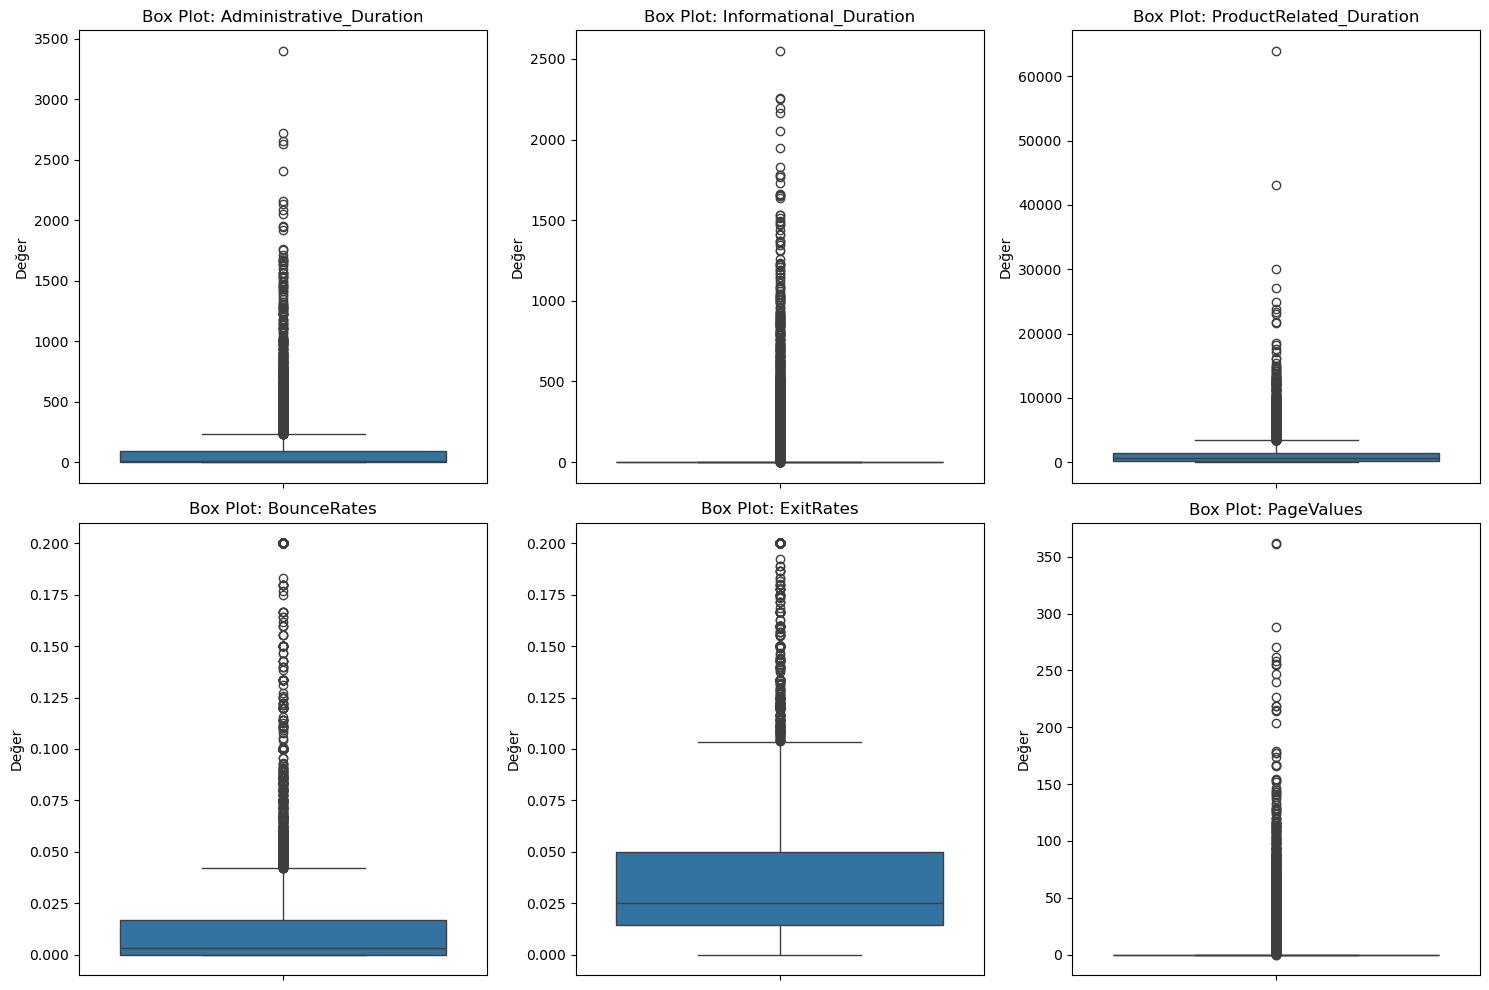

- Yukarıdaki Box Plot'larda, kutu dışındaki noktalar potansiyel uç değerleri göstermektedir.


In [14]:

    print("\n2. Box Plot ile Görsel Uç Değer Tespiti:")
    plt.figure(figsize=(15, 10))
    num_plots = len(cols_to_check_outliers)
    num_cols_grid = 3
    num_rows_grid = (num_plots + num_cols_grid - 1) // num_cols_grid # Gerekli satır sayısını hesapla

    for i, col in enumerate(cols_to_check_outliers):
        plt.subplot(num_rows_grid, num_cols_grid, i + 1)
        sns.boxplot(y=df_processed[col])
        plt.title(f'Box Plot: {col}')
        plt.ylabel('Değer')

    plt.tight_layout()
    plt.show()
    print("- Yukarıdaki Box Plot'larda, kutu dışındaki noktalar potansiyel uç değerleri göstermektedir.")


--- d. Uç Değer Yönetimi ---
Strateji: IQR yöntemi ile bulunan alt ve üst sınırların dışındaki değerler, sırasıyla alt ve üst sınıra eşitlenecektir (Capping).
Neden: Bu yöntem, uç değerlerin aşırı etkisini azaltırken veriyi tamamen silmez.

Uç Değer Baskılama (Capping) Uygulanıyor:
- 'Administrative_Duration' sütunundaki uç değerler baskılandı.
- 'Informational_Duration' sütunundaki uç değerler baskılandı.
- 'ProductRelated_Duration' sütunundaki uç değerler baskılandı.
- 'BounceRates' sütunundaki uç değerler baskılandı.
- 'ExitRates' sütunundaki uç değerler baskılandı.
- 'PageValues' sütunundaki uç değerler baskılandı.

Uç Değer Baskılama Sonrası Box Plot'lar:


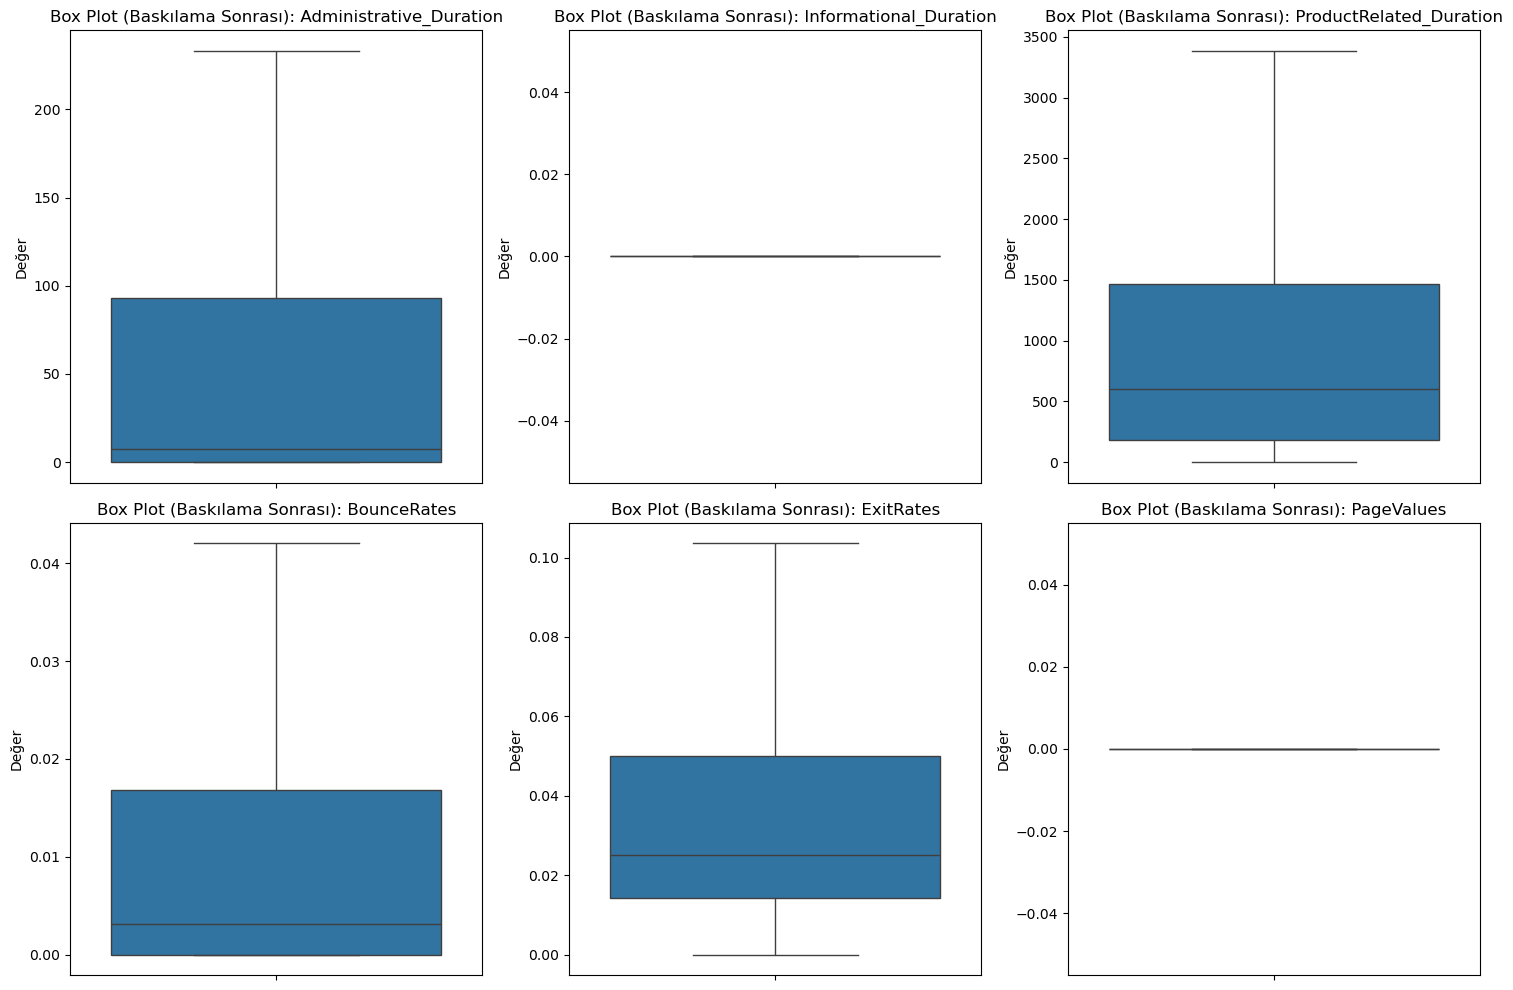

- Baskılama sonrası uç değerlerin etkisi azaltıldı.

Örnek ('ProductRelated_Duration') Değişim Özeti:
Önce: count    12330.00
mean      1194.75
std       1913.67
min          0.00
25%        184.14
50%        598.94
75%       1464.16
max      63973.52
Name: ProductRelated_Duration, dtype: float64
Sonra: count    12330.00
mean       989.69
std       1033.12
min          0.00
25%        184.14
50%        598.94
75%       1464.16
max       3384.19
Name: ProductRelated_Duration, dtype: float64


In [15]:
# %% d. Uç Değer Yönetimi
print("\n--- d. Uç Değer Yönetimi ---")

# Uç değerlere yapılacak işlem burada belirlenir. Örneğin, capping (baskılama) yaygın bir yöntemdir.
# Karar: IQR yöntemi ile tespit edilen sınırların dışındaki değerleri bu sınırlar ile değiştirelim (Capping/Winsorization).
print("Strateji: IQR yöntemi ile bulunan alt ve üst sınırların dışındaki değerler, sırasıyla alt ve üst sınıra eşitlenecektir (Capping).")
print("Neden: Bu yöntem, uç değerlerin aşırı etkisini azaltırken veriyi tamamen silmez.")

df_processed_before_capping = df_processed.copy() # Kıyaslama için işlem öncesini sakla

if not cols_to_check_outliers or not any(outlier_counts_iqr.values()):
     print("Tespit edilen veya incelenen uç değer olmadığı için bu adımda bir işlem yapılmadı.")
else:
    print("\nUç Değer Baskılama (Capping) Uygulanıyor:")
    for col in cols_to_check_outliers:
        if outlier_counts_iqr.get(col, 0) > 0: # Sadece IQR ile outlier bulunanlara uygula
            Q1 = df_processed[col].quantile(0.25)
            Q3 = df_processed[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Değerleri kırp (clip) veya np.where ile değiştir
            df_processed[col] = np.where(df_processed[col] < lower_bound, lower_bound, df_processed[col])
            df_processed[col] = np.where(df_processed[col] > upper_bound, upper_bound, df_processed[col])
            print(f"- '{col}' sütunundaki uç değerler baskılandı.")

    # Baskılama sonrası Box Plot'ları tekrar çizelim
    print("\nUç Değer Baskılama Sonrası Box Plot'lar:")
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(cols_to_check_outliers):
        plt.subplot(num_rows_grid, num_cols_grid, i + 1)
        sns.boxplot(y=df_processed[col])
        plt.title(f'Box Plot (Baskılama Sonrası): {col}')
        plt.ylabel('Değer')
    plt.tight_layout()
    plt.show()
    print("- Baskılama sonrası uç değerlerin etkisi azaltıldı.")

    # İstatistiksel Değişimi Gösterelim (Örnek olarak bir sütun)
    print("\nÖrnek ('ProductRelated_Duration') Değişim Özeti:")
    if 'ProductRelated_Duration' in cols_to_check_outliers:
        print("Önce:", df_processed_before_capping['ProductRelated_Duration'].describe().round(2))
        print("Sonra:", df_processed['ProductRelated_Duration'].describe().round(2))



## Ölçeklendirme
ölçeklendirme işlemi uygulanmıştır. Sayısal özelliklerin farklı değer aralıklarında olmasının bazı makine öğrenmesi algoritmalarını olumsuz etkilemesini engellemek amacıyla `StandardScaler` kullanılarak Standardizasyon yapılmıştır. Bu işlem, ilgili sayısal sütunların değerlerini ortalaması 0 ve standart sapması 1 olacak şekilde dönüştürmüştür.

## Kodlama
Kodlama işlemi uygulanmıştır. Makine öğrenmesi modellerinin işleyebilmesi için kategorik (metin veya belirli grupları temsil eden) özellikler sayısal formata çevrilmiştir. Nominal kategorik özellikler (Month, VisitorType gibi sıralama anlamı olmayanlar) için `One-Hot Encoding` yöntemi kullanılmıştır. Bu yöntem, her bir kategori için yeni bir ikili (0/1) sütun oluşturarak kategorik bilgiyi temsil eder.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from imblearn.pipeline import Pipeline as ImbPipeline # imblearn'den pipeline SMOTE ile kullanım için
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import time

In [17]:
df = df_processed.copy()
df['Revenue'] = df['Revenue'].astype(int)

print("\nHedef Değişken Dağılımı:")
print(df['Revenue'].value_counts(normalize=True))


Hedef Değişken Dağılımı:
Revenue
0    0.845255
1    0.154745
Name: proportion, dtype: float64


## 4) Makine Öğrenmesi Algoritması

Bu bölümde, "Online Shoppers Purchasing Intention" (Çevrimiçi Alışveriş Yapanların Satın Alma Niyeti) problemini çözmek için makine öğrenmesi algoritmaları uygulanmıştır. Hedefimiz, kullanıcıların bir oturum sonunda satın alma yapıp yapmayacağını ("Revenue" özelliği) tahmin etmektir. Bu bir ikili sınıflandırma problemidir.

### a. Probleme Uygun Olarak Seçilen Makine Öğrenme Algoritmaları ve Seçim Nedenleri

Bu problem için aşağıdaki üç farklı makine öğrenmesi algoritması seçilmiştir:

1.  **Lojistik Regresyon (Logistic Regression):**
    *   **Neden Seçildi?** İkili sınıflandırma problemleri için temel ve yaygın olarak kullanılan bir algoritmadır. Modelin yorumlanabilirliği yüksektir; yani hangi özelliklerin sonucu ne yönde etkilediği katsayılar aracılığıyla anlaşılabilir. Hızlı eğitilir ve iyi bir başlangıç noktası sunar.
2.  **Karar Ağacı Sınıflandırıcısı (Decision Tree Classifier):**
    *   **Neden Seçildi?** Hem sayısal hem de kategorik verilerle iyi çalışabilen, doğrusal olmayan ilişkileri yakalayabilen bir modeldir. Kurallara dayalı yapısı sayesinde modelin karar verme süreci kolayca görselleştirilebilir ve anlaşılabilir. Özellik ölçeklendirmesine ihtiyaç duymaz.
3.  **Rastgele Orman Sınıflandırıcısı (Random Forest Classifier):**
    *   **Neden Seçildi?** Birden fazla karar ağacının bir araya gelmesiyle oluşan bir topluluk öğrenmesi (ensemble learning) yöntemidir. Genellikle tek bir karar ağacından daha yüksek performans gösterir ve aşırı öğrenme (overfitting) sorununa daha dirençlidir. Özelliklerin önemini belirlemede de kullanışlıdır. Karmaşık veri setlerinde iyi sonuçlar verebilir.

### b. Seçilen Yöntemlerin Birbirlerine Karşı Avantaj ve Dezavantajları

| Algoritma           | Avantajları                                                                      | Dezavantajları                                                                 |
| ------------------- | -------------------------------------------------------------------------------- | ------------------------------------------------------------------------------ |
| **Lojistik Regresyon** | - Yorumlanabilir, hızlı eğitilir, olasılık tahmini yapar.                       | - Doğrusal ilişki varsayar, karmaşık ilişkileri yakalamada zayıf kalabilir.     |
| **Karar Ağacı**      | - Anlaşılır, görselleştirilebilir, özellik ölçeklendirmesi gerektirmez.          | - Aşırı öğrenmeye yatkındır, veri setindeki küçük değişikliklere duyarlı olabilir. |
| **Rastgele Orman**   | - Yüksek performans, aşırı öğrenmeye dirençli, özellik önemini belirler.        | - Yorumlanabilirliği düşüktür ("kara kutu"), hesaplama maliyeti daha yüksek olabilir. |

### c. Seçilen Yöntemlerin Performanslarının Değerlendirilmesi İçin Uygun Metrikler

Bu problemde hedef değişken ("Revenue") dengesiz dağılıma sahip olabilir (satın alma yapanların sayısı yapmayanlardan az olabilir). Bu nedenle sadece doğruluk (accuracy) metriğine bakmak yanıltıcı olabilir. Aşağıdaki metrikler kullanılmıştır:

*   **Doğruluk (Accuracy):** (TP + TN) / (TP + TN + FP + FN). Toplam doğru tahminlerin oranı.
*   **Kesinlik (Precision) (Sınıf 1 için):** TP / (TP + FP). Satın alma olarak tahmin edilenlerin ne kadarının gerçekten satın alma olduğu. Yanlış pozitiflerin maliyetli olduğu durumlarda önemlidir.
*   **Duyarlılık (Recall/Sensitivity) (Sınıf 1 için):** TP / (TP + FN). Gerçekten satın alma olanların ne kadarının doğru tahmin edildiği. Yanlış negatiflerin maliyetli olduğu durumlarda önemlidir.
*   **F1 Skoru (Sınıf 1 için):** 2 * (Precision * Recall) / (Precision + Recall). Kesinlik ve duyarlılığın harmonik ortalaması. Dengesiz sınıflarda daha iyi bir ölçüttür.
*   **AUC-ROC (Area Under the Receiver Operating Characteristic Curve):** Modelin farklı eşik değerlerinde pozitif ve negatif sınıfları ne kadar iyi ayırabildiğini gösteren bir ölçüttür. 0.5 rastgele tahmin, 1.0 mükemmel tahmin anlamına gelir. Dengesiz sınıflarda da kullanışlıdır.
*   **Karmaşıklık Matrisi (Confusion Matrix):** TP, TN, FP, FN değerlerini göstererek modelin performansını detaylıca incelememizi sağlar.

*(TP: True Positive, TN: True Negative, FP: False Positive, FN: False Negative)*

### d. Seçilen Yöntemlerin Nasıl Implemente Edildiği

Aşağıdaki kod bloklarında, veri ön işleme adımlarını (sayısal özellikler için standardizasyon, kategorik özellikler için one-hot encoding) içeren bir Pipeline oluşturulmuştur ve bu pipeline her bir modelle birleştirilerek eğitilecektir.

### e. Seçilen Yöntemler İçin Hiper-parametre Optimizasyonuna Dahil Edilebilecek Parametreler

*   **Lojistik Regresyon:**
    *   C: Düzenlileştirme (regularization) parametresinin tersi. Küçük C daha güçlü düzenlileştirme anlamına gelir.
    *   penalty: Kullanılmış düzenlileştirme türü ('l1', 'l2', 'elasticnet').
    *   solver: Optimizasyon için kullanılmış algoritma.
*   **Karar Ağacı:**
    *   criterion: Dallanma kalitesini ölçme kriteri ('gini', 'entropy').
    *   max_depth: Ağacın maksimum derinliği.
    *   min_samples_split: Bir iç düğümü bölmek için gereken minimum örnek sayısı.
    *   min_samples_leaf: Bir yaprak düğümünde olması gereken minimum örnek sayısı.
*   **Rastgele Orman:**
    *   n_estimators: Ormandaki ağaç sayısı.
    *   max_depth, min_samples_split, min_samples_leaf: Her bir ağaç için geçerli parametreler.
    *   max_features: En iyi dallanmayı ararken dikkate alınacak özellik sayısı.
    *   class_weight: Sınıf ağırlıkları ('balanced', 'balanced_subsample' veya özel bir sözlük).

### f. Hiper-parametre Optimizasyonu İçin Seçilen Yöntemler

Hiper-parametre optimizasyonu için RandomizedSearchCV yöntemi kullanılmıştırtır. bu yöntem rastgele parametre kombinasyonlarını dener ve büyük arama uzaylarında daha verimli olabiliyor.

*(Alternatif olarak GridSearchCV de kullanılabilir; u yöntem, belirtilen hiper-parametre değerlerinin tüm olası kombinasyonlarını deneyerek ve çapraz doğrulama (cross-validation) kullanarak en iyi parametre setini bulur.)*

In [18]:


# Hedef değişken ve özellikleri ayıralım
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# X = df.drop('Revenue', axis=1)
# y = df['Revenue'].astype(int)

# Define categorical and numerical features
categorical_features = ['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Ön işleme adımlarını tanımlayalım
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# ColumnTransformer ile ön işleyicileri birleştirelim
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough') # Belirtilmeyen sütunları olduğu gibi bırakır (eğer varsa)

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y) # stratify=y dengesiz sınıflarda önemli



In [19]:
def evaluate_model(name, model, X_test_processed, y_test, results_list, is_tuned=False):
    """Model performansını değerlendirir ve sonuçları listeye ekler."""
    start_time = time.time()
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]
    end_time = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    model_name_suffix = "_tuned" if is_tuned else "_initial"
    
    results_list.append({
        'Model': name + model_name_suffix,
        'Accuracy': accuracy,
        'Precision (Class 1)': precision,
        'Recall (Class 1)': recall,
        'F1 Score (Class 1)': f1,
        'AUC-ROC': auc_roc,
        'Prediction Time (s)': end_time - start_time
    })
    
    print(f"\n--- {name.replace('_', ' ').title()} {model_name_suffix.replace('_', ' ')} Performansı ---")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Karmaşıklık Matrisi
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Karmaşıklık Matrisi - {name}{model_name_suffix}')
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.show()
    
    return y_pred_proba

all_roc_data_initial = {}
all_roc_data_tuned = {}

### Temel Modellerin Eğitilmesi ve Değerlendirilmesi

İlk olarak, seçilen üç algoritmayı varsayılan (default) parametreleriyle ve sınıf ağırlıklandırması (`class_weight='balanced'`) kullanarak eğitecek ve performanslarını karşılaştıracağız. Bu, hiper-parametre optimizasyonunun ve diğer tekniklerin etkisini görmek için bir temel oluşturacaktır.

Temel 'Lojistik Regresyon' modeli eğitiliyor...
'Lojistik Regresyon' eğitimi 0.05 saniyede tamamlandı.

--- Lojistik Regresyon  initial Performansı ---
              precision    recall  f1-score   support

           0       0.92      0.61      0.73      2084
           1       0.26      0.73      0.38       382

    accuracy                           0.63      2466
   macro avg       0.59      0.67      0.56      2466
weighted avg       0.82      0.63      0.68      2466



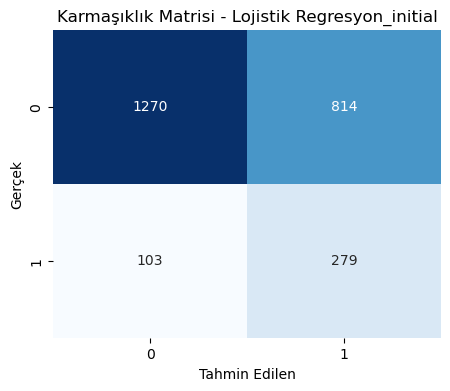

Temel 'Karar Ağacı' modeli eğitiliyor...
'Karar Ağacı' eğitimi 0.11 saniyede tamamlandı.

--- Karar Ağacı  initial Performansı ---
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2084
           1       0.29      0.30      0.29       382

    accuracy                           0.78      2466
   macro avg       0.58      0.58      0.58      2466
weighted avg       0.78      0.78      0.78      2466



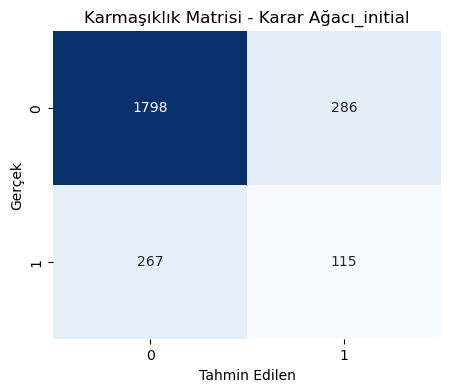

Temel 'Rastgele Orman' modeli eğitiliyor...
'Rastgele Orman' eğitimi 0.95 saniyede tamamlandı.

--- Rastgele Orman  initial Performansı ---
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2084
           1       0.56      0.09      0.16       382

    accuracy                           0.85      2466
   macro avg       0.71      0.54      0.54      2466
weighted avg       0.81      0.85      0.80      2466



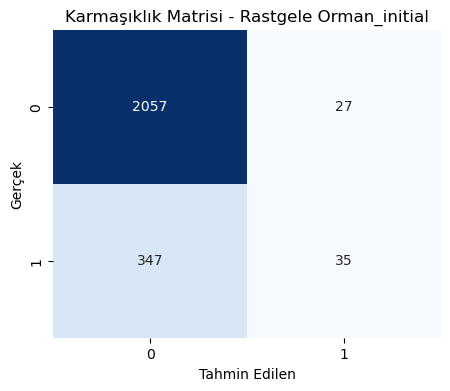

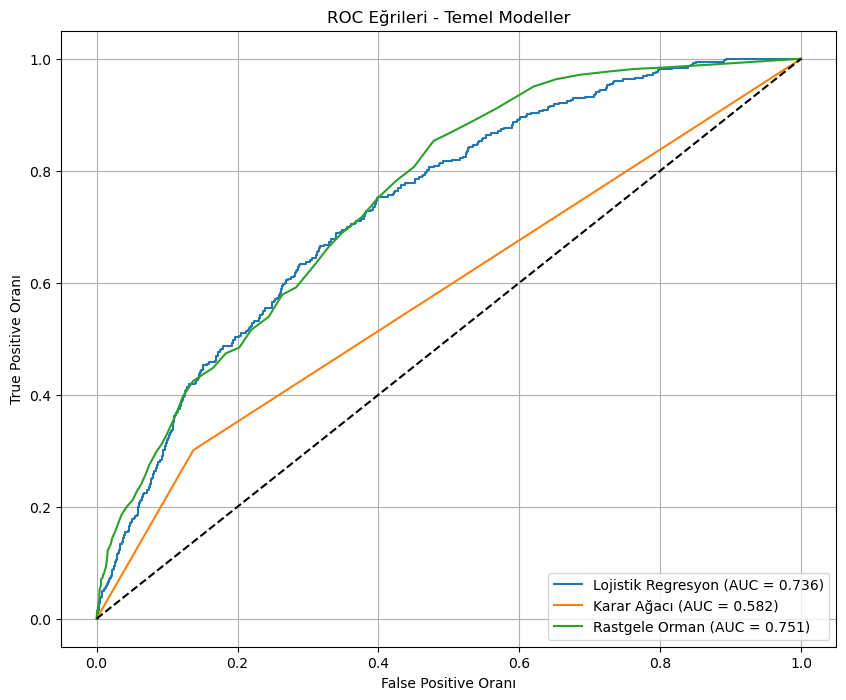


--- Temel Model Performansları Tablosu ---
                        Model  Accuracy  Precision (Class 1)  \
0  Lojistik Regresyon_initial  0.628143             0.255261   
1         Karar Ağacı_initial  0.775750             0.286783   
2      Rastgele Orman_initial  0.848337             0.564516   

   Recall (Class 1)  F1 Score (Class 1)   AUC-ROC  Prediction Time (s)  
0          0.730366            0.378305  0.736302             0.002910  
1          0.301047            0.293742  0.581906             0.001772  
2          0.091623            0.157658  0.750694             0.056414  


In [20]:
models_initial_dict = {
    'Lojistik Regresyon': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced', solver='liblinear'),
    'Karar Ağacı': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Rastgele Orman': RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100) # n_estimators için bir başlangıç değeri
}

results_initial = []

X_train_processed_initial = preprocessor.fit_transform(X_train)
X_test_processed_initial = preprocessor.transform(X_test)


for name, model_instance in models_initial_dict.items():
    print(f"Temel '{name}' modeli eğitiliyor...")
    start_train_time = time.time()
    model_instance.fit(X_train_processed_initial, y_train)
    end_train_time = time.time()
    print(f"'{name}' eğitimi {end_train_time - start_train_time:.2f} saniyede tamamlandı.")
    
    y_pred_proba = evaluate_model(name, model_instance, X_test_processed_initial, y_test, results_initial, is_tuned=False)
    all_roc_data_initial[name] = roc_curve(y_test, y_pred_proba)


# ROC Eğrilerini tek bir grafikte çizelim
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, _) in all_roc_data_initial.items():
    auc = roc_auc_score(y_test, models_initial_dict[name].predict_proba(X_test_processed_initial)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC Eğrileri - Temel Modeller')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

results_initial_df = pd.DataFrame(results_initial)
print("\n--- Temel Model Performansları Tablosu ---")
print(results_initial_df)

### g. Hiper-parametre Optimizasyonu Uygulanması ve Sonuçların Karşılaştırılması

Bu adımda, `RandomizedSearchCV` kullanarak her bir model için en iyi hiper-parametre setlerini bulacağız.
Optimizasyon sonrası elde edilen sonuçlar, temel model sonuçlarıyla karşılaştırılacaktır.
Karşılaştırma, AUC-ROC ve F1 Skoru (Sınıf 1 için) gibi metrikler üzerinden yapılacaktır.
Çapraz doğrulama (`cv=5`) kullanılacak ve dengesiz sınıflar için önemli olan `roc_auc` metriği `scoring` olarak belirlenecektir.

**Lojistik Regresyon Parametre Adayları:**
*   `model__C`: Düzenlileştirme katsayısı.
*   `model__penalty`: Düzenlileştirme türü (L1 veya L2).
*   `model__solver`: Optimizasyon algoritması.

**Karar Ağacı Parametre Adayları:**
*   `model__criterion`: Bölünme kriteri.
*   `model__max_depth`: Ağacın maksimum derinliği.
*   `model__min_samples_split`: Bir düğümü bölmek için gereken minimum örnek.
*   `model__min_samples_leaf`: Bir yaprak düğümündeki minimum örnek.

**Rastgele Orman Parametre Adayları:**
*   `model__n_estimators`: Ormandaki ağaç sayısı.
*   `model__max_depth`: Ağaçların maksimum derinliği.
*   `model__min_samples_split`: Bir düğümü bölmek için gereken minimum örnek.
*   `model__min_samples_leaf`: Bir yaprak düğümündeki minimum örnek.
*   `model__class_weight`: Sınıf ağırlığı.


'Lojistik Regresyon' için hiper-parametre optimizasyonu yapılıyor...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\Techno\.conda\envs\transformers\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


'Lojistik Regresyon' optimizasyonu 7.92 saniyede tamamlandı.
En iyi parametreler (Lojistik Regresyon): {'model__solver': 'liblinear', 'model__penalty': 'l2', 'model__class_weight': 'balanced', 'model__C': 0.1}
En iyi CV ROC_AUC skoru (Lojistik Regresyon): 0.7604

--- Lojistik Regresyon  tuned Performansı ---
              precision    recall  f1-score   support

           0       0.93      0.61      0.74      2084
           1       0.26      0.74      0.38       382

    accuracy                           0.63      2466
   macro avg       0.59      0.67      0.56      2466
weighted avg       0.82      0.63      0.68      2466



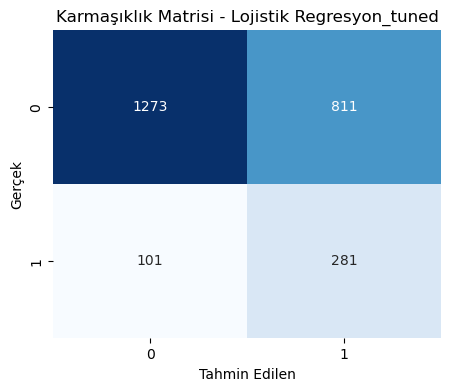


'Karar Ağacı' için hiper-parametre optimizasyonu yapılıyor...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
'Karar Ağacı' optimizasyonu 0.71 saniyede tamamlandı.
En iyi parametreler (Karar Ağacı): {'model__min_samples_split': 20, 'model__min_samples_leaf': 5, 'model__max_depth': 5, 'model__criterion': 'entropy', 'model__class_weight': 'balanced'}
En iyi CV ROC_AUC skoru (Karar Ağacı): 0.7429

--- Karar Ağacı  tuned Performansı ---
              precision    recall  f1-score   support

           0       0.92      0.63      0.75      2084
           1       0.26      0.72      0.38       382

    accuracy                           0.64      2466
   macro avg       0.59      0.67      0.56      2466
weighted avg       0.82      0.64      0.69      2466



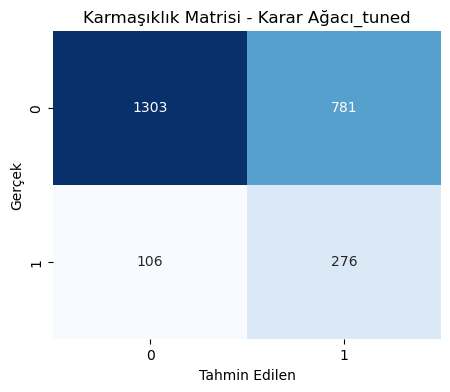


'Rastgele Orman' için hiper-parametre optimizasyonu yapılıyor...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
'Rastgele Orman' optimizasyonu 5.41 saniyede tamamlandı.
En iyi parametreler (Rastgele Orman): {'model__n_estimators': 100, 'model__min_samples_split': 10, 'model__min_samples_leaf': 1, 'model__max_depth': 20, 'model__class_weight': 'balanced'}
En iyi CV ROC_AUC skoru (Rastgele Orman): 0.7819

--- Rastgele Orman  tuned Performansı ---
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2084
           1       0.37      0.34      0.36       382

    accuracy                           0.81      2466
   macro avg       0.63      0.62      0.62      2466
weighted avg       0.80      0.81      0.81      2466



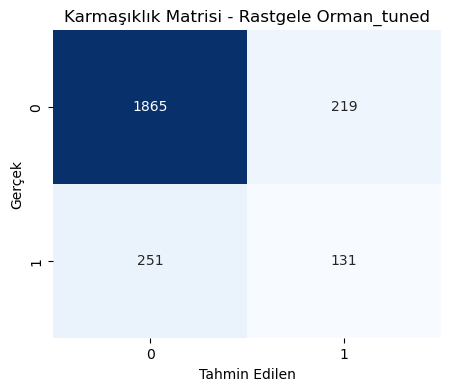

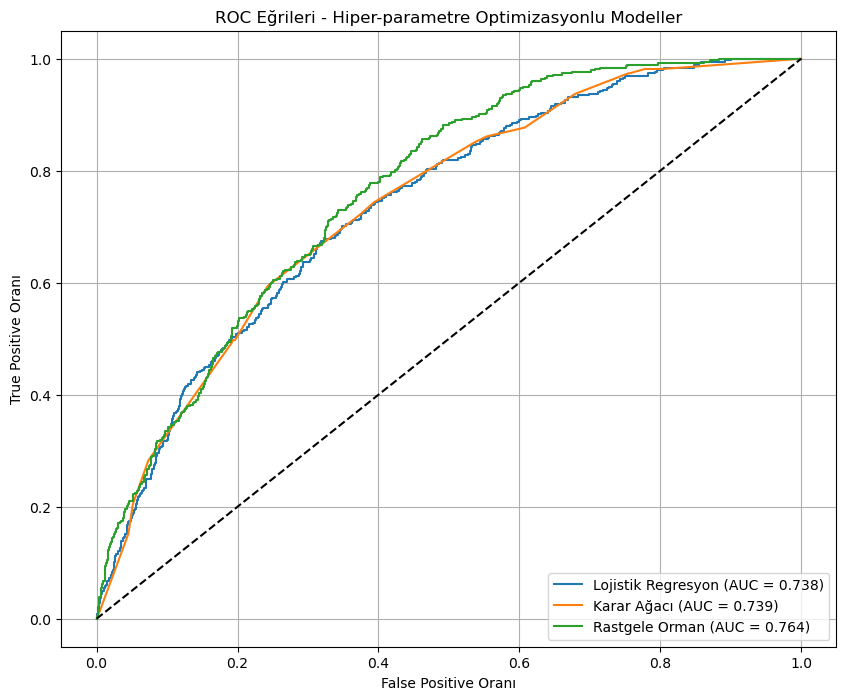


--- Hiper-parametre Optimizasyonlu Model Performansları Tablosu ---
                      Model  Accuracy  Precision (Class 1)  Recall (Class 1)  \
0  Lojistik Regresyon_tuned  0.630170             0.257326          0.735602   
1         Karar Ağacı_tuned  0.640308             0.261116          0.722513   
2      Rastgele Orman_tuned  0.809408             0.374286          0.342932   

   F1 Score (Class 1)   AUC-ROC  Prediction Time (s)  
0            0.381275  0.737825             0.014010  
1            0.383600  0.739185             0.000000  
2            0.357923  0.763515             0.066288  


In [21]:
# Parametre aralıklarını tanımlayalım
param_grid_lr = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear'], # 'l1' penalty için 'liblinear' veya 'saga' iyi bir seçenektir
    'model__class_weight': ['balanced']
}

param_grid_dt = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 5, 10, 15], # Daha küçük değerler eklendi
    'model__min_samples_split': [2, 10, 20], # Daha büyük değerler eklendi
    'model__min_samples_leaf': [1, 5, 10],   # Daha büyük değerler eklendi
    'model__class_weight': ['balanced']
}

param_grid_rf = {
    'model__n_estimators': [50, 100], # Hızlı denemeler için azaltıldı, normalde [100, 200, 300] olabilir
    'model__max_depth': [None, 10, 20], # Daha küçük değerler eklendi
    'model__min_samples_split': [2, 10],
    'model__min_samples_leaf': [1, 5],
    'model__class_weight': ['balanced', 'balanced_subsample']
}

# Modeller ve pipeline'ları
pipeline_lr = ImbPipeline(steps=[('preprocessor', preprocessor),
                                  ('model', LogisticRegression(max_iter=1000, random_state=42))])

pipeline_dt = ImbPipeline(steps=[('preprocessor', preprocessor),
                                  ('model', DecisionTreeClassifier(random_state=42))])

pipeline_rf = ImbPipeline(steps=[('preprocessor', preprocessor),
                                  ('model', RandomForestClassifier(random_state=42))])

search_configs = {
    'Lojistik Regresyon': (pipeline_lr, param_grid_lr),
    'Karar Ağacı': (pipeline_dt, param_grid_dt),
    'Rastgele Orman': (pipeline_rf, param_grid_rf)
}

results_tuned = []
best_estimators = {}
all_roc_data_tuned = {}

for name, (pipeline, param_grid) in search_configs.items():
    print(f"\n'{name}' için hiper-parametre optimizasyonu yapılıyor...")
    random_search = RandomizedSearchCV(pipeline, 
                                       param_distributions=param_grid,
                                       n_iter=10, # 10 farklı kombinasyon denenecek
                                       cv=3, 
                                       scoring='roc_auc', 
                                       n_jobs=-1, 
                                       random_state=42,
                                       verbose=1)    
    start_tune_time = time.time()
    random_search.fit(X_train, y_train) # Ön işleme pipeline içinde olduğu için ham X_train kullanılır
    end_tune_time = time.time()
    
    best_estimators[name] = random_search.best_estimator_
    print(f"'{name}' optimizasyonu {end_tune_time - start_tune_time:.2f} saniyede tamamlandı.")
    print(f"En iyi parametreler ({name}): {random_search.best_params_}")
    print(f"En iyi CV ROC_AUC skoru ({name}): {random_search.best_score_:.4f}")
    
    # En iyi modeli test seti üzerinde değerlendirelim (ön işleme pipeline içinde)
    y_pred_proba_tuned = evaluate_model(name, random_search.best_estimator_, X_test, y_test, results_tuned, is_tuned=True)
    all_roc_data_tuned[name] = roc_curve(y_test, y_pred_proba_tuned)
    
# ROC Eğrilerini tek bir grafikte çizelim (Tuned Modeller)
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, _) in all_roc_data_tuned.items():
    auc = roc_auc_score(y_test, best_estimators[name].predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC Eğrileri - Hiper-parametre Optimizasyonlu Modeller')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

results_tuned_df = pd.DataFrame(results_tuned)
print("\n--- Hiper-parametre Optimizasyonlu Model Performansları Tablosu ---")
print(results_tuned_df)

### Sonuçların Karşılaştırılması ve Tartışılması 2

## Yorum:
Hiper-parametre optimizasyonu sonucunda farklı makine öğrenmesi algoritmalarında farklı metriklerde iyileşmeler görülüyor.
En dikkate değer olanlar şunlardır:
Karar Ağaçları'nın (Decision Trees) Duyarlılık (Recall) skoru önemli ölçüde iyileşti.
Rastgele Ormanlar'ın (Random Forest) F1 skoru iyileşti.
Hem Karar Ağaçları hem de Rastgele Ormanlar için AUC skoru iyileşti.


### h. Hangi Algoritma En İyi Sonucu Elde Etti, Sonuçlar Tartışılmalı

Lojistik Regresyon'un (Logistic Regression) optimize edilmiş versiyonu, özellikle azınlık sınıfı (Revenue = 1) nedeniyle önemli olan Duyarlılık (Recall) ve F1 skoru başta olmak üzere çoğu kategoride en iyi gibi görünüyor.

In [22]:
# İki DataFrame'i birleştirebilir veya yan yana gösterebilirsiniz.
print("\n--- TÜM SONUÇLARIN KARŞILAŞTIRILMASI ---")
all_results_df = pd.concat([results_initial_df, results_tuned_df], ignore_index=True)
print(all_results_df.sort_values(by='AUC-ROC', ascending=False))


--- TÜM SONUÇLARIN KARŞILAŞTIRILMASI ---
                        Model  Accuracy  Precision (Class 1)  \
5        Rastgele Orman_tuned  0.809408             0.374286   
2      Rastgele Orman_initial  0.848337             0.564516   
4           Karar Ağacı_tuned  0.640308             0.261116   
3    Lojistik Regresyon_tuned  0.630170             0.257326   
0  Lojistik Regresyon_initial  0.628143             0.255261   
1         Karar Ağacı_initial  0.775750             0.286783   

   Recall (Class 1)  F1 Score (Class 1)   AUC-ROC  Prediction Time (s)  
5          0.342932            0.357923  0.763515             0.066288  
2          0.091623            0.157658  0.750694             0.056414  
4          0.722513            0.383600  0.739185             0.000000  
3          0.735602            0.381275  0.737825             0.014010  
0          0.730366            0.378305  0.736302             0.002910  
1          0.301047            0.293742  0.581906             0.001772 

## 5) Performans Artışı

Model performansını daha da artırmak için ek teknikler uygulanacaktır.

### a. Özellik Seçme (Feature Selection) Yöntemleri

**Açıklama:**
Özellik seçimi, modelin performansını artırmak, aşırı öğrenmeyi azaltmak ve modelin yorumlanabilirliğini iyileştirmek için en alakalı özellikleri seçme sürecidir.
Bu projede iki farklı özellik seçme yöntemi denenecektir:

1.  **SelectKBest (Univariate Selection - ANOVA F-testi ile):**
    *   **Neden Seçildi?** Sayısal özellikler ve kategorik hedef değişkeni arasındaki ilişkileri test etmek için basit ve hızlı bir yöntemdir. Her bir özelliğin hedef değişkenle olan istatistiksel ilişkisine göre en iyi 'k' tane özelliği seçer.
    *   **Nasıl Çalışır?** ANOVA F-testi, her bir sayısal özelliğin ortalamalarının, hedef değişkenin farklı sınıfları arasında anlamlı bir şekilde farklılaşıp farklılaşmadığını değerlendirir. Yüksek F değeri, özellik ile hedef arasında daha güçlü bir ilişki olduğunu gösterir.
2.  **Recursive Feature Elimination (RFE) (Lojistik Regresyon ile):**
    *   **Neden Seçildi?** Model tabanlı bir özellik seçme yöntemidir. Belirli bir modeli kullanarak özelliklerin önemini değerlendirir ve en az önemli olanları yinelemeli olarak çıkarır. Özellikler arasındaki etkileşimleri bir dereceye kadar dikkate alabilir.
    *   **Nasıl Çalışır?** RFE, tüm özelliklerle bir model eğitir, özelliklerin önemini (veya katsayılarını) alır, en az önemli olan bir veya daha fazla özelliği çıkarır ve kalan özelliklerle modeli yeniden eğitir. Bu işlem, istenen sayıda özelliğe ulaşılana kadar devam eder.

Bu yöntemler, hiper-parametre optimizasyonu yapılmış en iyi model (veya tüm modeller) üzerinde denenerek sonuçları karşılaştırılacaktır.

In [23]:
# Denemeler için Rastgele Orman'ı temel alalım
base_model_for_fs_pca = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)

# Özellik seçme yöntemlerini pipeline'a ekleyerek deneyeceğiz
results_fs = []
all_roc_data_fs = {}


SelectKBest (k=20) ile Rastgele Orman eğitiliyor...


C:\Users\Techno\.conda\envs\transformers\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3 8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Techno\.conda\envs\transformers\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Eğitim 1.32 saniyede tamamlandı.

--- Rf Selectkbest K20  initial Performansı ---
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2084
           1       0.45      0.09      0.15       382

    accuracy                           0.84      2466
   macro avg       0.65      0.54      0.53      2466
weighted avg       0.79      0.84      0.79      2466



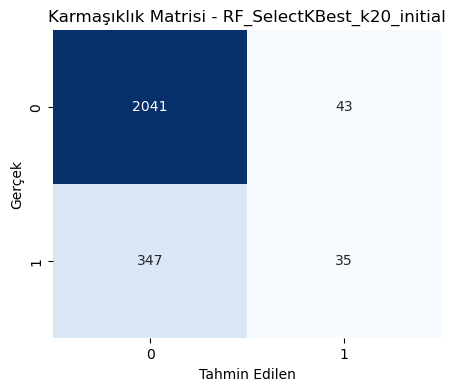

In [24]:
# Yöntem 1: SelectKBest

# İlk olarak tüm özellikleri işleyelim
X_train_full_processed = preprocessor.fit_transform(X_train)
X_test_full_processed = preprocessor.transform(X_test)
num_total_features = X_train_full_processed.shape[1]

# SelectKBest için K değeri (örneğin toplam özellik sayısının yarısı veya belirli bir sayı)
k_best_count = min(20, num_total_features // 2) if num_total_features > 1 else 1

pipeline_fs_kbest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('select_kbest', SelectKBest(score_func=f_classif, k=k_best_count)),
    ('model', base_model_for_fs_pca)
])

print(f"\nSelectKBest (k={k_best_count}) ile Rastgele Orman eğitiliyor...")
start_fs_time = time.time()
pipeline_fs_kbest.fit(X_train, y_train)
end_fs_time = time.time()
print(f"Eğitim {end_fs_time - start_fs_time:.2f} saniyede tamamlandı.")
y_pred_proba_fs_kbest = evaluate_model(f'RF_SelectKBest_k{k_best_count}', pipeline_fs_kbest, X_test, y_test, results_fs)
all_roc_data_fs[f'RF_SelectKBest_k{k_best_count}'] = roc_curve(y_test, y_pred_proba_fs_kbest)


RFE (n_features=15) ile Rastgele Orman eğitiliyor...
Eğitim 2.54 saniyede tamamlandı.

--- Rf Rfe N15  initial Performansı ---
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2084
           1       0.34      0.16      0.22       382

    accuracy                           0.82      2466
   macro avg       0.60      0.55      0.56      2466
weighted avg       0.78      0.82      0.79      2466



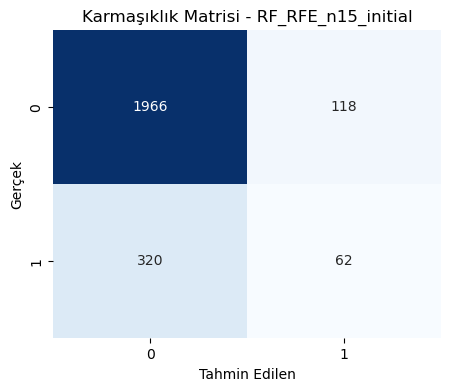


--- Özellik Seçme Sonrası Model Performansları ---
                        Model  Accuracy  Precision (Class 1)  \
0  RF_SelectKBest_k20_initial  0.841849             0.448718   
1          RF_RFE_n15_initial  0.822384             0.344444   

   Recall (Class 1)  F1 Score (Class 1)   AUC-ROC  Prediction Time (s)  
0          0.091623            0.152174  0.741111             0.075116  
1          0.162304            0.220641  0.703473             0.076007  


In [25]:
# Yöntem 2: RFE (Recursive Feature Elimination)

estimator_for_rfe = LogisticRegression(solver='liblinear', class_weight='balanced', C=best_estimators.get('Lojistik Regresyon', pipeline_lr).named_steps['model'].C if 'Lojistik Regresyon' in best_estimators else 1, penalty='l1', max_iter=1000, random_state=42)
# RFE için özellik sayısı (örneğin 15)
num_features_for_rfe = min(15, num_total_features -1) if num_total_features >1 else 1


pipeline_fs_rfe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfe', RFE(estimator=estimator_for_rfe, n_features_to_select=num_features_for_rfe, step=1)),
    ('model', base_model_for_fs_pca)
])

print(f"\nRFE (n_features={num_features_for_rfe}) ile Rastgele Orman eğitiliyor...")
start_fs_time = time.time()
pipeline_fs_rfe.fit(X_train, y_train)
end_fs_time = time.time()
print(f"Eğitim {end_fs_time - start_fs_time:.2f} saniyede tamamlandı.")
y_pred_proba_fs_rfe = evaluate_model(f'RF_RFE_n{num_features_for_rfe}', pipeline_fs_rfe, X_test, y_test, results_fs)
all_roc_data_fs[f'RF_RFE_n{num_features_for_rfe}'] = roc_curve(y_test, y_pred_proba_fs_rfe)


results_fs_df = pd.DataFrame(results_fs)
print("\n--- Özellik Seçme Sonrası Model Performansları ---")
print(results_fs_df)

### Yorum:
İki yöntem arasında çok büyük bir fark görünmüyor, ancak temel (optimize edilmemiş) Lojistik Regresyon ile karşılaştırıldığında, doğrulukta (accuracy) bir artış olmasına rağmen hem Duyarlılık (Recall) hem de F1 Skorunda bir düşüş var.

### b. PCA (Principal Component Analysis - Temel Bileşen Analizi) ile Boyut Düşürme

**Açıklama:**
PCA, özellikler arasındaki korelasyonları kullanarak veri setinin boyutunu azaltan bir tekniktir. Orijinal özellikleri, varyansın çoğunu açıklayan daha az sayıda yeni, ilişkisiz "temel bileşenlere" dönüştürür.
PCA, özellikle çok sayıda sayısal özellik olduğunda ve bu özellikler arasında yüksek korelasyon olduğunda kullanışlıdır.

**Neden Seçildi?**
Veri setimizdeki sayısal özelliklerin sayısını azaltarak modelin eğitim süresini kısaltabilir ve potansiyel olarak gürültüyü azaltarak performansı artırabilir.

**Nasıl Çalışır?**
PCA, verinin en fazla varyansa sahip olduğu yönleri bulur. Bu yönler temel bileşenlerdir. Genellikle, varyansın %95 veya %99'unu açıklayan bileşen sayısı kadar bileşen seçilir.
Bu yöntemi, hiper-parametre optimizasyonu yapılmış en iyi model (veya tüm modeller) üzerinde deneyerek sonuçları karşılaştıracağız. PCA, genellikle sayısal özellikler ölçeklendirildikten sonra uygulanır. Kategorik özellikler (one-hot encoding sonrası) genellikle PCA'e dahil edilmez.


PCA ile Rastgele Orman eğitiliyor...
Eğitim 1.55 saniyede tamamlandı.

--- Rf Pca  initial Performansı ---
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2084
           1       0.48      0.04      0.08       382

    accuracy                           0.84      2466
   macro avg       0.67      0.52      0.50      2466
weighted avg       0.79      0.84      0.79      2466



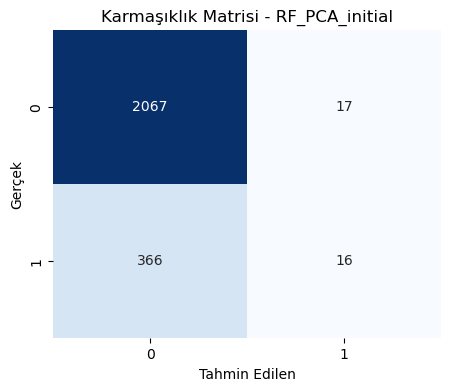


--- PCA Sonrası Model Performansları ---
            Model  Accuracy  Precision (Class 1)  Recall (Class 1)  \
0  RF_PCA_initial  0.844688             0.484848          0.041885   

   F1 Score (Class 1)   AUC-ROC  Prediction Time (s)  
0            0.077108  0.744045             0.094862  

PCA sonrası kullanılan bileşen sayısı: 7


In [26]:
# Varyansın %95'ini koruyan bileşen sayısını seçelim
numerical_transformer_pca = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

preprocessor_pca = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_pca, numerical_features),
        ('cat', categorical_transformer, categorical_features) # Kategorik özellikler PCA'siz
    ], remainder='passthrough')

pipeline_pca = Pipeline(steps=[
    ('preprocessor_pca', preprocessor_pca),
    ('model', base_model_for_fs_pca) # Aynı temel modeli kullanalım
])

print("\nPCA ile Rastgele Orman eğitiliyor...")
start_pca_time = time.time()
pipeline_pca.fit(X_train, y_train)
end_pca_time = time.time()
print(f"Eğitim {end_pca_time - start_pca_time:.2f} saniyede tamamlandı.")

results_pca = []
y_pred_proba_pca = evaluate_model('RF_PCA', pipeline_pca, X_test, y_test, results_pca)
# ROC verisini genel listeye ekleyelim, daha sonra karşılaştırma için
all_roc_data_fs['RF_PCA'] = roc_curve(y_test, y_pred_proba_pca)


results_pca_df = pd.DataFrame(results_pca)
print("\n--- PCA Sonrası Model Performansları ---")
print(results_pca_df)


# PCA sonrası kullanılan bileşen sayısını görelim
# Pipeline'dan PCA adımını çekmemiz gerekiyor
fitted_preprocessor_pca = pipeline_pca.named_steps['preprocessor_pca']
# ColumnTransformer içindeki 'num' pipeline'ını ve onun içindeki 'pca' adımını bulalım
# Bu, ColumnTransformer'ın yapısına bağlı olarak değişebilir.
# Eğer ColumnTransformer.transformers_ ile erişiliyorsa:
num_pipeline_in_ct = fitted_preprocessor_pca.named_transformers_['num']
pca_step = num_pipeline_in_ct.named_steps['pca']
print(f"\nPCA sonrası kullanılan bileşen sayısı: {pca_step.n_components_}")

### Yorum:
Temel (optimize edilmemiş) Rastgele Orman ile karşılaştırıldığında, doğruluk aynı kalırken Duyarlılık (Recall) ve F1 Skoru biraz düştü. 
Boyut azaltmanın bu veri setinde pek faydalı olmadığını düşünüyorum çünkü zaten başlangıçta yüksek boyutlu değil.


### c. Özellik Seçme ve PCA Yöntemi Sonucunda Elde Edilen Sonuçların Sözel Olarak Tartışılması

*   Özellik seçimi performansı artırdı mı, azalttı mı, yoksa benzer mi kaldı?
*   PCA performansı nasıl etkiledi? Boyut azaltma ne kadar oldu?
*   Hangi yöntem (varsa) azınlık sınıfını yakalamada daha başarılı oldu?

## Sınıf Dengesizliği İçin Ek Teknikler: SMOTE ve SMOTEENN

Hedef değişkenimizdeki ("Revenue") sınıf dengesizliği model performansını olumsuz etkileyebilir.
Bu bölümde, bu dengesizliği gidermeye yönelik iki popüler resampling tekniği olan SMOTE ve SMOTEENN'i deneyip, etkilerini en iyi modelimiz üzerinde (veya tüm modellerde) gözlemleyeceğiz.
Bu teknikler **sadece eğitim verisine** uygulanmalıdır.

**SMOTE (Synthetic Minority Over-sampling Technique):**
*   **Açıklama:** Azınlık sınıfından sentetik yeni örnekler oluşturarak veri setini dengeler. Mevcut azınlık örnekleri arasında interpolasyon yaparak yeni örnekler üretir.
*   **Neden Seçildi?** Basit random oversampling'in neden olabileceği aşırı öğrenmeyi azaltmaya yardımcı olurken azınlık sınıfına dair daha fazla bilgi sunar.

**SMOTEENN (SMOTE + Edited Nearest Neighbours):**
*   **Açıklama:** SMOTE ile azınlık sınıfını çoğalttıktan sonra, ENN (Edited Nearest Neighbours) ile gürültülü ve sınırda kalmış örnekleri temizleyerek daha iyi bir sınıf ayrımı sağlamayı hedefler.
*   **Neden Seçildi?** Hem oversampling hem de undersampling'in avantajlarını birleştirerek daha temiz ve dengeli bir eğitim seti oluşturabilir.

Bu teknikler, `imblearn` kütüphanesindeki `Pipeline` ile kullanılacaktır.


SMOTE ile Rastgele Orman eğitiliyor...


C:\Users\Techno\.conda\envs\transformers\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Techno\.conda\envs\transformers\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Eğitim 2.69 saniyede tamamlandı.

--- Rf Smote  initial Performansı ---
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2084
           1       0.39      0.24      0.30       382

    accuracy                           0.82      2466
   macro avg       0.63      0.59      0.60      2466
weighted avg       0.80      0.82      0.81      2466



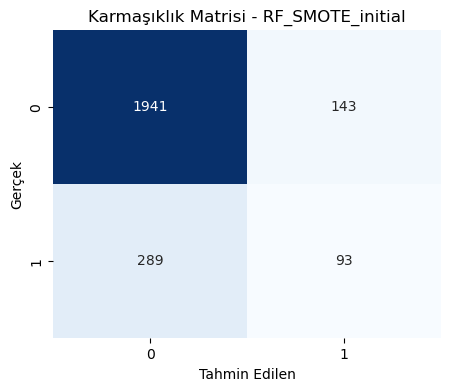


SMOTEENN ile Rastgele Orman eğitiliyor...
Eğitim 2.04 saniyede tamamlandı.

--- Rf Smoteenn  initial Performansı ---
              precision    recall  f1-score   support

           0       0.92      0.67      0.78      2084
           1       0.27      0.67      0.39       382

    accuracy                           0.67      2466
   macro avg       0.60      0.67      0.58      2466
weighted avg       0.82      0.67      0.72      2466



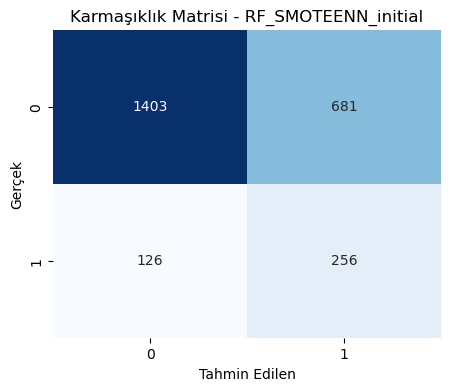


--- SMOTE/SMOTEENN Sonrası Model Performansları ---
                 Model  Accuracy  Precision (Class 1)  Recall (Class 1)  \
0     RF_SMOTE_initial  0.824818             0.394068          0.243455   
1  RF_SMOTEENN_initial  0.672749             0.273212          0.670157   

   F1 Score (Class 1)   AUC-ROC  Prediction Time (s)  
0            0.300971  0.755377             0.097521  
1            0.388173  0.755486             0.078319  


In [27]:
results_smote_techniques = []
all_roc_data_smote = {}

# SMOTE ile Rastgele Orman
pipeline_rf_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', base_model_for_fs_pca) # class_weight='balanced' burada çıkarılabilir, SMOTE zaten dengelemeyi yapıyor
])

print("\nSMOTE ile Rastgele Orman eğitiliyor...")
start_smote_time = time.time()
pipeline_rf_smote.fit(X_train, y_train)
end_smote_time = time.time()
print(f"Eğitim {end_smote_time - start_smote_time:.2f} saniyede tamamlandı.")
y_pred_proba_smote = evaluate_model('RF_SMOTE', pipeline_rf_smote, X_test, y_test, results_smote_techniques)
all_roc_data_smote['RF_SMOTE'] = roc_curve(y_test, y_pred_proba_smote)


# SMOTEENN ile Rastgele Orman
pipeline_rf_smoteenn = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smoteenn', SMOTEENN(random_state=42)),
    ('model', base_model_for_fs_pca)
])

print("\nSMOTEENN ile Rastgele Orman eğitiliyor...")
start_smote_time = time.time()
pipeline_rf_smoteenn.fit(X_train, y_train)
end_smote_time = time.time()
print(f"Eğitim {end_smote_time - start_smote_time:.2f} saniyede tamamlandı.")
y_pred_proba_smoteenn = evaluate_model('RF_SMOTEENN', pipeline_rf_smoteenn, X_test, y_test, results_smote_techniques)
all_roc_data_smote['RF_SMOTEENN'] = roc_curve(y_test, y_pred_proba_smoteenn)


results_smote_df = pd.DataFrame(results_smote_techniques)
print("\n--- SMOTE/SMOTEENN Sonrası Model Performansları ---")
print(results_smote_df)

### Yorum:
Temel (optimize edilmemiş) Rastgele Orman ile karşılaştırıldığında, hem SMOTE hem de SMOTEENN doğrulukta bir miktar düşüş gösterse de hem Duyarlılık (Recall) hem de F1 Skorunda önemli bir artış sağlıyor. Bu da bu prosedürleri bu veri seti için çok kullanışlı hale getiriyor.


## Tüm Yöntemlerin ROC Eğrileri Üzerinden Karşılaştırılması

Bu bölümde, hiper-parametre optimizasyonu yapılmış en iyi model, özellik seçimi uygulanmış modeller, PCA uygulanmış model ve SMOTE/SMOTEENN uygulanmış modellerin ROC eğrileri tek bir grafikte gösterilerek genel bir performans karşılaştırması yapılacaktır.

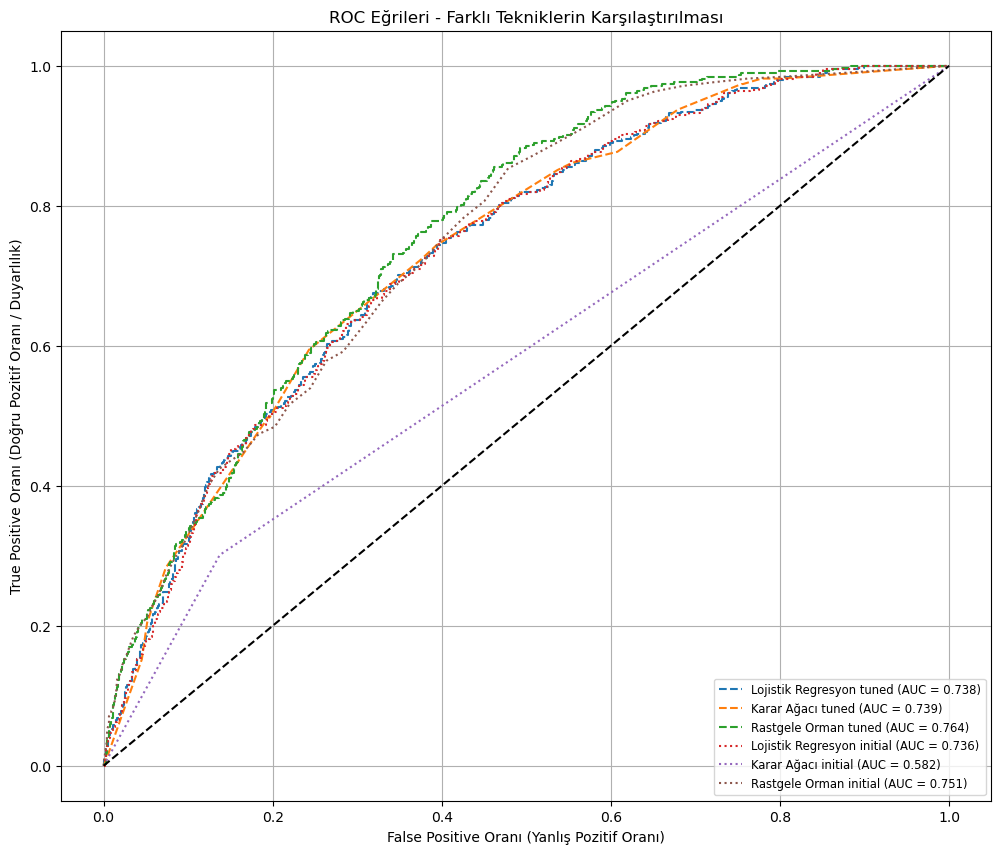

In [28]:
plt.figure(figsize=(12, 10))
all_model_pipelines_for_roc = {} # Store pipelines if needed for other re-evaluations, though not strictly for AUC here

# 1. En iyi optimize edilmiş modelleri ekleyelim
for model_name_key, best_pipe in best_estimators.items():
    # model_name_key will be 'Lojistik Regresyon', 'Karar Ağacı', 'Rastgele Orman'
    # The actual model name for display is model_name_key + "_tuned"
    display_name = model_name_key + "_tuned"
    
    # AUC skorunu results_tuned_df'den alalım
    auc_row = results_tuned_df[results_tuned_df['Model'] == display_name]
    if not auc_row.empty:
        auc_val = auc_row['AUC-ROC'].iloc[0]
        # ROC verisini all_roc_data_tuned'dan alalım
        if model_name_key in all_roc_data_tuned: # Check if key exists
            fpr, tpr, _ = all_roc_data_tuned[model_name_key]
            plt.plot(fpr, tpr, label=f'{display_name.replace("_", " ")} (AUC = {auc_val:.3f})', linestyle='--')
            all_model_pipelines_for_roc[display_name] = best_pipe


# 2. Özellik Seçme & PCA ROC verilerini çiz
# all_roc_data_fs dictionary'si (fpr, tpr, _) ve ilgili pipeline'ları tutar
# AUC skorlarını results_fs_df ve results_pca_df'den alacağız

# Önce Feature Selection modelleri için
for model_name_key, (fpr, tpr, _) in all_roc_data_fs.items():
    auc_row_fs = results_fs_df[results_fs_df['Model'] == model_name_key]
    auc_row_pca = results_pca_df[results_pca_df['Model'] == model_name_key] # PCA için ayrı kontrol
    
    auc_val = None
    if not auc_row_fs.empty:
        auc_val = auc_row_fs['AUC-ROC'].iloc[0]
    elif not auc_row_pca.empty: # Eğer PCA sonucuysa
        auc_val = auc_row_pca['AUC-ROC'].iloc[0]

    if auc_val is not None:
        plt.plot(fpr, tpr, label=f'{model_name_key.replace("_", " ")} (AUC = {auc_val:.3f})')
        # İlgili pipeline'ı da saklayabiliriz
        if 'SelectKBest' in model_name_key: all_model_pipelines_for_roc[model_name_key] = pipeline_fs_kbest
        elif 'RFE' in model_name_key: all_model_pipelines_for_roc[model_name_key] = pipeline_fs_rfe
        elif 'PCA' in model_name_key: all_model_pipelines_for_roc[model_name_key] = pipeline_pca


# 3. SMOTE/SMOTEENN ROC verilerini çiz
for model_name_key, (fpr, tpr, _) in all_roc_data_smote.items():
    auc_row = results_smote_df[results_smote_df['Model'] == model_name_key]
    if not auc_row.empty:
        auc_val = auc_row['AUC-ROC'].iloc[0]
        plt.plot(fpr, tpr, label=f'{model_name_key.replace("_", " ")} (AUC = {auc_val:.3f})')
        if 'SMOTEENN' in model_name_key: all_model_pipelines_for_roc[model_name_key] = pipeline_rf_smoteenn
        elif 'SMOTE' in model_name_key: all_model_pipelines_for_roc[model_name_key] = pipeline_rf_smote

# 4. Temel (Optimize Edilmemiş) Modelleri de ekleyelim (karşılaştırma için)
for model_name_key, (fpr, tpr, _) in all_roc_data_initial.items():
    # model_name_key burada 'Lojistik Regresyon', 'Karar Ağacı', 'Rastgele Orman'
    display_name_initial = model_name_key + "_initial" # results_initial_df'deki gibi
    auc_row = results_initial_df[results_initial_df['Model'] == display_name_initial]
    if not auc_row.empty:
        auc_val = auc_row['AUC-ROC'].iloc[0]
        plt.plot(fpr, tpr, label=f'{display_name_initial.replace("_", " ")} (AUC = {auc_val:.3f})', linestyle=':')


plt.plot([0, 1], [0, 1], 'k--') # Rastgele tahmin çizgisi
plt.xlabel('False Positive Oranı (Yanlış Pozitif Oranı)')
plt.ylabel('True Positive Oranı (Doğru Pozitif Oranı / Duyarlılık)')
plt.title('ROC Eğrileri - Farklı Tekniklerin Karşılaştırılması')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.show()

## Tüm Sonuçların Birleştirilmiş Tablosu ve Nihai Tartışma

Bu bölümde, temel modellerden başlayarak uygulanan tüm teknikler (hiper-parametre optimizasyonu, özellik seçimi, PCA, SMOTE/SMOTEENN) sonucunda elde edilen performans metrikleri tek bir tabloda birleştirilirrilebilir.

In [29]:
# results_tuned_df, results_fs_df, results_pca_df, results_smote_df DataFrame'lerini birleştirelim
final_comparison_df = pd.concat([results_initial_df, results_tuned_df, results_fs_df, results_pca_df, results_smote_df], ignore_index=True)

# Model adına göre gruplayıp en iyi AUC-ROC'ye sahip olanı seçebiliriz veya tümünü gösterebiliriz
print("\n--- TÜM YÖNTEMLERİN PERFORMANS KARŞILAŞTIRMASI ---")
print(final_comparison_df.sort_values(by=['AUC-ROC', 'F1 Score (Class 1)'], ascending=False))


--- TÜM YÖNTEMLERİN PERFORMANS KARŞILAŞTIRMASI ---
                         Model  Accuracy  Precision (Class 1)  \
5         Rastgele Orman_tuned  0.809408             0.374286   
10         RF_SMOTEENN_initial  0.672749             0.273212   
9             RF_SMOTE_initial  0.824818             0.394068   
2       Rastgele Orman_initial  0.848337             0.564516   
8               RF_PCA_initial  0.844688             0.484848   
6   RF_SelectKBest_k20_initial  0.841849             0.448718   
4            Karar Ağacı_tuned  0.640308             0.261116   
3     Lojistik Regresyon_tuned  0.630170             0.257326   
0   Lojistik Regresyon_initial  0.628143             0.255261   
7           RF_RFE_n15_initial  0.822384             0.344444   
1          Karar Ağacı_initial  0.775750             0.286783   

    Recall (Class 1)  F1 Score (Class 1)   AUC-ROC  Prediction Time (s)  
5           0.342932            0.357923  0.763515             0.066288  
10          0.67015